# **Introduction**

The main purpose of this EDA is to prepare final data set: cleaned properly, with reduced number of features (when they have too many NaN values, carry the same type of information, are redundant), some main engineered features from all additional data sets (bureau data, previous applications and payments in the Home Credit).

# **1. Data set up**

In [ ]:
from helpers import helpers as h
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from IPython.display import Image
from warnings import filterwarnings
filterwarnings(action="ignore")
%matplotlib inline   
%load_ext blackcellmagic

In [ ]:
pd.set_option("float_format", "{:.2f}".format)
pd.set_option("display.max_columns", None) 
pd.set_option("display.max_rows", 100) 
sns.set_theme(style="darkgrid")

In [ ]:
train_df = pd.read_csv("application_train.csv")
installment_payments_df = pd.read_csv("installments_payments.csv")
pos_cash_balance_df = pd.read_csv("POS_CASH_balance.csv")
previous_application_df = pd.read_csv("previous_application.csv")
credit_card_balance = pd.read_csv("credit_card_balance.csv")
bureau_df = pd.read_csv("bureau.csv")
bureau_balance_df = pd.read_csv("bureau_balance.csv")
feature_description = pd.read_csv("HomeCredit_columns_description.csv", encoding="ISO-8859-1")

In [ ]:
feature_description[feature_description["Row"] == "TARGET"]["Description"].to_list()

['Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)']

In [ ]:
train_df.shape

(307511, 122)

In [ ]:
pd.DataFrame(train_df.dtypes).T

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,int64,int64,object,object,object,object,int64,float64,float64,float64,float64,object,object,object,object,object,float64,int64,int64,float64,int64,float64,int64,int64,int64,int64,int64,int64,object,float64,int64,int64,object,int64,int64,int64,int64,int64,int64,int64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,float64,object,object,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64


# **2. Data cleaning**

* **Duplicates.**

In [ ]:
len(train_df.SK_ID_CURR.unique())

307511

There are no duplicate id's of loan receivers.

* **Missing data.**

In [ ]:
h.missing_data(train_df).head(10)

,Total,Percent
COMMONAREA_MEDI,214865,69.87
COMMONAREA_AVG,214865,69.87
COMMONAREA_MODE,214865,69.87
NONLIVINGAPARTMENTS_MODE,213514,69.43
NONLIVINGAPARTMENTS_AVG,213514,69.43
NONLIVINGAPARTMENTS_MEDI,213514,69.43
FONDKAPREMONT_MODE,210295,68.39
LIVINGAPARTMENTS_MODE,210199,68.35
LIVINGAPARTMENTS_AVG,210199,68.35
LIVINGAPARTMENTS_MEDI,210199,68.35


In [ ]:
# missing in defaults:
defaults  = train_df[train_df["TARGET"] == 1]

In [ ]:
h.missing_data(defaults).head(10)

,Total,Percent
COMMONAREA_MODE,18423,74.21
COMMONAREA_AVG,18423,74.21
COMMONAREA_MEDI,18423,74.21
NONLIVINGAPARTMENTS_MODE,18327,73.82
NONLIVINGAPARTMENTS_AVG,18327,73.82
NONLIVINGAPARTMENTS_MEDI,18327,73.82
FONDKAPREMONT_MODE,18125,73.01
LIVINGAPARTMENTS_MEDI,18122,73.00
LIVINGAPARTMENTS_AVG,18122,73.00
LIVINGAPARTMENTS_MODE,18122,73.00


Here we see, that in "defaults" group we have even more missing data, if all would be dropped (rows), we would have no data at all. So I'll leave for now missing values untouched and deal with them in the end, after all other data cleaning and EDA.

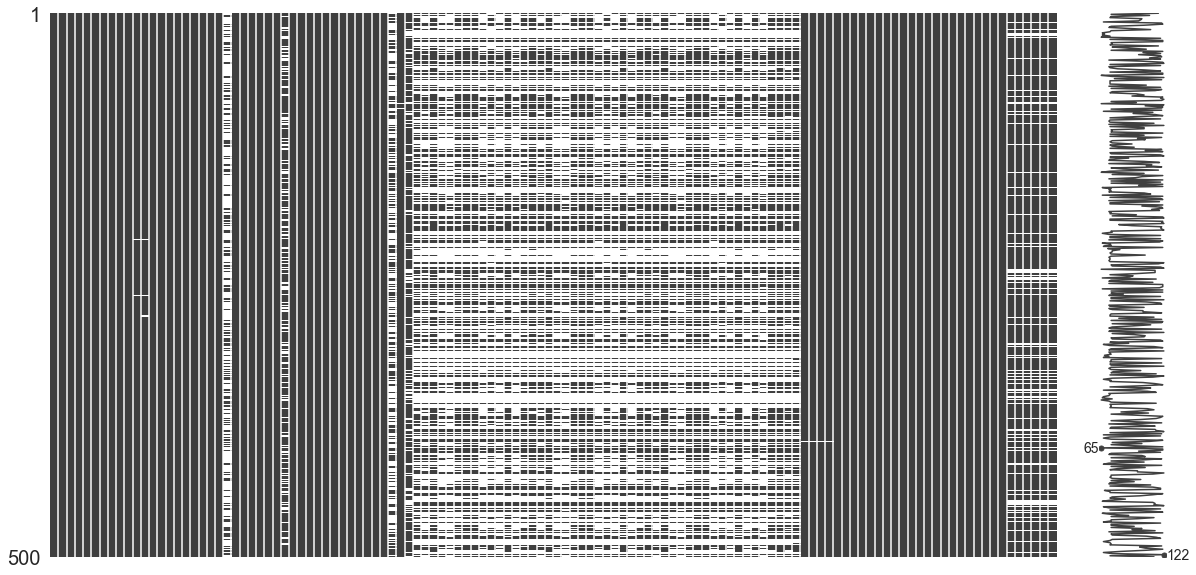

In [ ]:
msno.matrix(train_df.sample(500), inline=True, sparkline=True, figsize=(20,10), sort=None)

Zooming in on the middle columns we see they deal mostly with information about the buildings where clients lives. It appears there are many applicants who leave blank the information for their housing. 

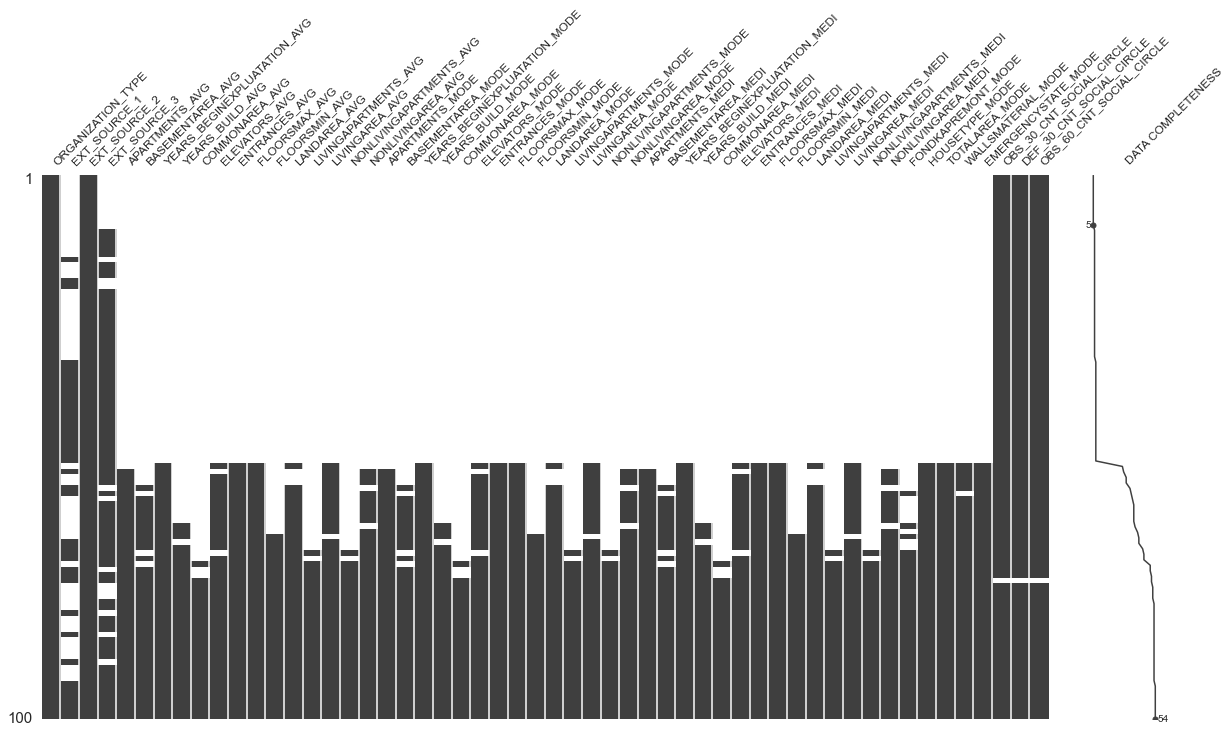

In [ ]:
msno.matrix(train_df.iloc[0:100, 40:94], inline=True, sparkline=True, figsize=(20,10), sort="ascending", fontsize=12, labels=True)

Seems that data about housing is missing not at random, people are just avoiding: maybe there are too many questions about it and they get tired, or they don't want to give this kind of information as a negative factor about their living conditions. So all in all seems that this kind of information is difficult to get and it can be a problem to gather it in the future too. The decision about these columns are more clearly explained in the data_cleaning_explanation.ipynb, some of these columns (with almost 70 percent of values) will be dropped.

* **Cleaning**

In [ ]:
cleaned_train_df = (
    train_df.pipe(h.copy_df)
    .pipe(
        h.new_col_count_binary,
            "submitted_addit_docs",
            [
                "FLAG_DOCUMENT_2",
                "FLAG_DOCUMENT_3",
                "FLAG_DOCUMENT_4",
                "FLAG_DOCUMENT_5",
                "FLAG_DOCUMENT_6",
                "FLAG_DOCUMENT_7",
                "FLAG_DOCUMENT_8",
                "FLAG_DOCUMENT_9",
                "FLAG_DOCUMENT_10",
                "FLAG_DOCUMENT_11",
                "FLAG_DOCUMENT_12",
                "FLAG_DOCUMENT_13",
                "FLAG_DOCUMENT_14",
                "FLAG_DOCUMENT_15",
                "FLAG_DOCUMENT_16",
                "FLAG_DOCUMENT_17",
                "FLAG_DOCUMENT_18",
                "FLAG_DOCUMENT_19",
                "FLAG_DOCUMENT_20",
                "FLAG_DOCUMENT_21",
            ],
        )
    .pipe(
        h.new_col_count_binary,
            "prop_of_unmatched_contact_perm_work_addr",
            [
                "REG_REGION_NOT_LIVE_REGION",
                "REG_REGION_NOT_WORK_REGION",
                "LIVE_REGION_NOT_WORK_REGION",
                "REG_CITY_NOT_LIVE_CITY",
                "REG_CITY_NOT_WORK_CITY",
                "LIVE_CITY_NOT_WORK_CITY",
            ],
        )
    .pipe(
        h.new_col_count_binary,
            "prop_of_provided_living_place_info",
            [
                "APARTMENTS_AVG",
                "BASEMENTAREA_AVG",
                "YEARS_BEGINEXPLUATATION_AVG",
                "YEARS_BUILD_AVG",
                "COMMONAREA_AVG",
                "ELEVATORS_AVG",
                "ENTRANCES_AVG",
                "FLOORSMAX_AVG",
                "FLOORSMIN_AVG",
                "LANDAREA_AVG",
                "LIVINGAPARTMENTS_AVG",
                "LIVINGAREA_AVG",
                "NONLIVINGAPARTMENTS_AVG",
                "NONLIVINGAREA_AVG",
                "APARTMENTS_MODE",
                "BASEMENTAREA_MODE",
                "YEARS_BEGINEXPLUATATION_MODE",
                "YEARS_BUILD_MODE",
                "COMMONAREA_MODE",
                "ELEVATORS_MODE",
                "ENTRANCES_MODE",
                "FLOORSMAX_MODE",
                "FLOORSMIN_MODE",
                "LANDAREA_MODE",
                "LIVINGAPARTMENTS_MODE",
                "LIVINGAREA_MODE",
                "NONLIVINGAPARTMENTS_MODE",
                "NONLIVINGAREA_MODE",
                "APARTMENTS_MEDI",
                "BASEMENTAREA_MEDI",
                "YEARS_BEGINEXPLUATATION_MEDI",
                "YEARS_BUILD_MEDI",
                "COMMONAREA_MEDI",
                "ELEVATORS_MEDI",
                "ENTRANCES_MEDI",
                "FLOORSMAX_MEDI",
                "FLOORSMIN_MEDI",
                "LANDAREA_MEDI",
                "LIVINGAPARTMENTS_MEDI",
                "LIVINGAREA_MEDI",
                "NONLIVINGAPARTMENTS_MEDI",
                "NONLIVINGAREA_MEDI",
                "TOTALAREA_MODE",
                "OWN_CAR_AGE"
            ],
        )
    .pipe(
        h.new_col_count_binary,
            "prop_of_provided_phone_email_info",
            ["FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL"],
        )
    .pipe(h.days_to_years,"DAYS_BIRTH", "age_years")
    .pipe(h.days_to_years,"DAYS_REGISTRATION", "last_reg_change_in_years")
    .pipe(h.days_to_years,"DAYS_LAST_PHONE_CHANGE", "last_phone_change_in_years")
    .pipe(h.days_to_years,"DAYS_EMPLOYED", "employment_years")
    .pipe(h.days_to_years,"DAYS_ID_PUBLISH", "id_published_years")
    .pipe(
        h.drop_columns,
            [
                "FLAG_DOCUMENT_2",
                "FLAG_DOCUMENT_3",
                "FLAG_DOCUMENT_4",
                "FLAG_DOCUMENT_5",
                "FLAG_DOCUMENT_6",
                "FLAG_DOCUMENT_7",
                "FLAG_DOCUMENT_8",
                "FLAG_DOCUMENT_9",
                "FLAG_DOCUMENT_10",
                "FLAG_DOCUMENT_11",
                "FLAG_DOCUMENT_12",
                "FLAG_DOCUMENT_13",
                "FLAG_DOCUMENT_14",
                "FLAG_DOCUMENT_15",
                "FLAG_DOCUMENT_16",
                "FLAG_DOCUMENT_17",
                "FLAG_DOCUMENT_18",
                "FLAG_DOCUMENT_19",
                "FLAG_DOCUMENT_20",
                "FLAG_DOCUMENT_21",
                "AMT_REQ_CREDIT_BUREAU_HOUR",
                "AMT_REQ_CREDIT_BUREAU_DAY",
                "AMT_REQ_CREDIT_BUREAU_WEEK",
                "AMT_REQ_CREDIT_BUREAU_MON",
                "AMT_REQ_CREDIT_BUREAU_QRT",
                "REGION_RATING_CLIENT",
                "REG_REGION_NOT_LIVE_REGION",
                "REG_REGION_NOT_WORK_REGION",
                "LIVE_REGION_NOT_WORK_REGION",
                "REG_CITY_NOT_LIVE_CITY",
                "REG_CITY_NOT_WORK_CITY",
                "LIVE_CITY_NOT_WORK_CITY",
                "APARTMENTS_AVG",
                "BASEMENTAREA_AVG",
                "YEARS_BEGINEXPLUATATION_AVG",
                "YEARS_BUILD_AVG",
                "COMMONAREA_AVG",
                "ELEVATORS_AVG",
                "ENTRANCES_AVG",
                "FLOORSMAX_AVG",
                "FLOORSMIN_AVG",
                "LANDAREA_AVG",
                "LIVINGAPARTMENTS_AVG",
                "LIVINGAREA_AVG",
                "NONLIVINGAPARTMENTS_AVG",
                "NONLIVINGAREA_AVG",
                "APARTMENTS_MODE",
                "BASEMENTAREA_MODE",
                "YEARS_BEGINEXPLUATATION_MODE",
                "YEARS_BUILD_MODE",
                "COMMONAREA_MODE",
                "ELEVATORS_MODE",
                "ENTRANCES_MODE",
                "FLOORSMAX_MODE",
                "FLOORSMIN_MODE",
                "LANDAREA_MODE",
                "LIVINGAPARTMENTS_MODE",
                "LIVINGAREA_MODE",
                "NONLIVINGAPARTMENTS_MODE",
                "NONLIVINGAREA_MODE",
                "APARTMENTS_MEDI",
                "BASEMENTAREA_MEDI",
                "YEARS_BEGINEXPLUATATION_MEDI",
                "YEARS_BUILD_MEDI",
                "COMMONAREA_MEDI",
                "ELEVATORS_MEDI",
                "ENTRANCES_MEDI",
                "FLOORSMAX_MEDI",
                "FLOORSMIN_MEDI",
                "LANDAREA_MEDI",
                "LIVINGAPARTMENTS_MEDI",
                "LIVINGAREA_MEDI",
                "NONLIVINGAPARTMENTS_MEDI",
                "NONLIVINGAREA_MEDI",
                "TOTALAREA_MODE",
                "EMERGENCYSTATE_MODE",
                "FONDKAPREMONT_MODE",
                "HOUSETYPE_MODE",
                "WALLSMATERIAL_MODE",
                "DAYS_BIRTH",
                "FLAG_WORK_PHONE",
                "FLAG_CONT_MOBILE",
                "FLAG_PHONE",
                "FLAG_EMAIL",
                "DAYS_LAST_PHONE_CHANGE",
                "DAYS_EMPLOYED",
                "DAYS_REGISTRATION",
                "DAYS_ID_PUBLISH",
                "OBS_30_CNT_SOCIAL_CIRCLE",
                "DEF_60_CNT_SOCIAL_CIRCLE"
            ]
        )
    .pipe(h.lower_case_column_names)
    .pipe(h.lowercase_values)
    .pipe(h.replace_char_underscore)
)

In [10]:
# Additional cases of cleaning and feature engineering.

# Age bins.
cleaned_train_df["age_bins"] = pd.cut(
    cleaned_train_df["age_years"], bins=np.linspace(20, 70, num=11)
)

# Replacing outlier in total amount column.
h.replace_outliers(cleaned_train_df, "amt_income_total")

# Fill Nan's.
cleaned_train_df["amt_req_credit_bureau_year"].fillna(0, inplace=True)

# Changing bad values in the employment length column.
cleaned_train_df.loc[
    cleaned_train_df["employment_years"] < 0, "employment_years"
] = np.nan
cleaned_train_df["employment_years"] = cleaned_train_df["employment_years"].fillna(
    cleaned_train_df.groupby(["age_bins"])["employment_years"].transform("mean")
)
cleaned_train_df.loc[
    cleaned_train_df["employment_years"] == -0.00, "employment_years"
] = 0
cleaned_train_df["employment_bins"] = pd.cut(
    cleaned_train_df["employment_years"], bins=np.linspace(0, 50, num=11)
)
cleaned_train_df["employment_bins"].fillna(
    cleaned_train_df["employment_bins"].value_counts().index[0], inplace=True
)

# Fill NaN's last phone change in years - mean.
cleaned_train_df["last_phone_change_in_years"] = cleaned_train_df[
    "last_phone_change_in_years"
].fillna(0)


# Fill NaN's with 0 social circle.
cleaned_train_df["def_30_cnt_social_circle"].fillna(0, inplace=True)
cleaned_train_df["obs_60_cnt_social_circle"].fillna(0, inplace=True)

# Replace extreme outlies (range 0.05 -0.95 percentile) social circle.
h.replace_outliers(cleaned_train_df, "def_30_cnt_social_circle")
h.replace_outliers(cleaned_train_df, "obs_60_cnt_social_circle")

In [ ]:
cleaned_train_df.head()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,own_car_age,flag_mobil,flag_emp_phone,occupation_type,cnt_fam_members,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,organization_type,ext_source_1,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,amt_req_credit_bureau_year,submitted_addit_docs,prop_of_unmatched_contact_perm_work_addr,prop_of_provided_living_place_info,prop_of_provided_phone_email_info,age_years,last_reg_change_in_years,last_phone_change_in_years,employment_years,id_published_years,age_bins,employment_bins
0,100002,1,cash_loans,m,n,y,0,202500.00,406597.50,24700.50,351000.00,unaccompanied,working,secondary_secondary_special,single_not_married,house_apartment,0.02,NaN,1,1,laborers,1.00,2,wednesday,10,business_entity_type_3,0.08,0.26,0.14,2.00,2.00,2.00,2.00,1.00,0.05,0.00,0.14,0.50,25.92,9.99,3.11,1.75,5.81,"(25.0, 30.0]","(0.0, 5.0]"
1,100003,0,cash_loans,f,n,n,0,270000.00,1293502.50,35698.50,1129500.00,family,state_servant,higher_education,married,house_apartment,0.00,NaN,1,1,core_staff,2.00,1,monday,11,school,0.31,0.62,NaN,1.00,0.00,1.00,0.00,0.00,0.05,0.00,0.20,0.50,45.93,3.25,2.27,3.25,0.80,"(45.0, 50.0]","(0.0, 5.0]"
2,100004,0,revolving_loans,m,y,y,0,67500.00,135000.00,6750.00,135000.00,unaccompanied,working,secondary_secondary_special,single_not_married,house_apartment,0.01,26.00,1,1,laborers,1.00,2,monday,9,government,NaN,0.56,0.73,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.59,0.75,52.18,11.67,2.23,0.62,6.93,"(50.0, 55.0]","(0.0, 5.0]"
3,100006,0,cash_loans,f,n,y,0,135000.00,312682.50,29686.50,297000.00,unaccompanied,working,secondary_secondary_special,civil_marriage,house_apartment,0.01,NaN,1,1,laborers,2.00,2,wednesday,17,business_entity_type_3,NaN,0.65,NaN,2.00,0.00,2.00,0.00,0.00,0.05,0.00,0.00,0.25,52.07,26.94,1.69,8.33,6.68,"(50.0, 55.0]","(5.0, 10.0]"
4,100007,0,cash_loans,m,n,y,0,121500.00,513000.00,21865.50,513000.00,unaccompanied,working,secondary_secondary_special,single_not_married,house_apartment,0.03,NaN,1,1,core_staff,1.00,2,thursday,11,religion,NaN,0.32,NaN,0.00,0.00,0.00,0.00,0.00,0.05,0.33,0.00,0.25,54.61,11.81,3.03,8.32,9.47,"(50.0, 55.0]","(5.0, 10.0]"


# **3. EDA of the main training data set**

### **3.1. Target**

In [ ]:
cleaned_train_df.target.value_counts(normalize=True)

0   0.92
1   0.08
Name: target, dtype: float64

In [ ]:
percentage_loans = pd.DataFrame(
    cleaned_train_df.target.value_counts(normalize=True) * 100
)
percentage_loans.rename(
    index={0: "No payment difficulties", 1: "With payment difficulties"}, inplace=True
)

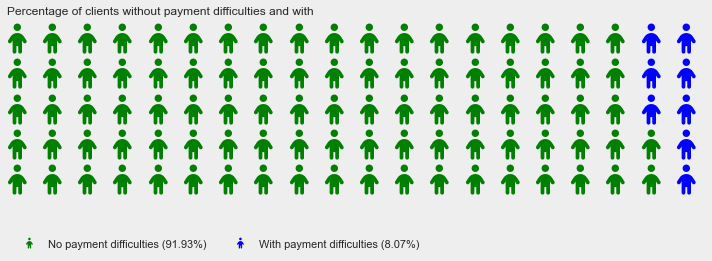

In [ ]:
h.plot_total_percentage_of_loans(
    percentage_loans,
    "target",
    "Percentage of clients without payment difficulties and with",
)

So we have clear data imbalance in here, only 8 percent of all loan receivers had payment difficulties.

### **3.2. Main information about loan**

It this section I will observe main features about the given loan: funded loan amount, price of the goods, contract type.

#### **3.2.1. Credit amount**

Credit amount of the loan.

In [ ]:
cleaned_train_df.groupby("target")["amt_credit"].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,282686.00,602648.28,406845.91,45000.00,270000.00,517788.00,810000.00,4050000.00
1,24825.00,557778.53,346433.24,45000.00,284400.00,497520.00,733315.50,4027680.00


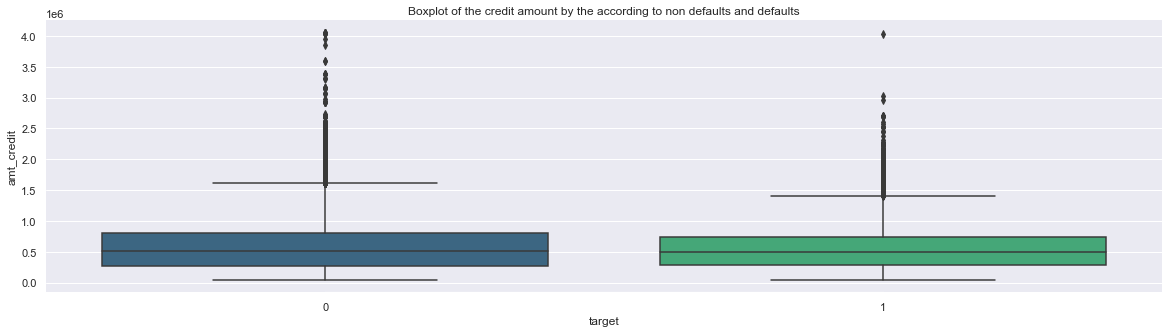

In [ ]:
h.plot_boxplot(
    cleaned_train_df,
    "target",
    "amt_credit",
    "Boxplot of the credit amount by the according to non defaults and defaults",
)

* The mean of the defaulters loan amount is a little bit lower. Non defaulter: 602648.28 and defaulters: 557778.53. min and max values are quite similar. So could this difference in mean loan amounts be statistically significant?

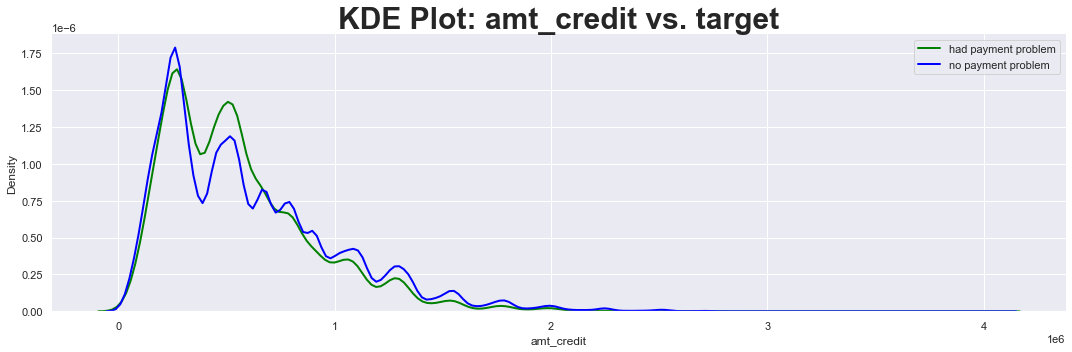

In [ ]:
h.plot_kde(cleaned_train_df, "amt_credit", "target")

* The density plots of loan amount looks quite similar in both groups(defaulters and non defaulters).

In [ ]:
cleaned_train_df.groupby("code_gender")["amt_credit"].agg(["count", "mean", "std"])

,count,mean,std
code_gender,,,
f,202448,592766.72,397581.62
m,105059,611095.20,411524.19
xna,4,399375.00,110799.65


* The mean of credit amount also differs by gender: male tend to have higher loans on average (difference about 20 k).

In [ ]:
age_credit = cleaned_train_df.groupby("age_bins")["amt_credit"].agg(["count", "mean", "std"])

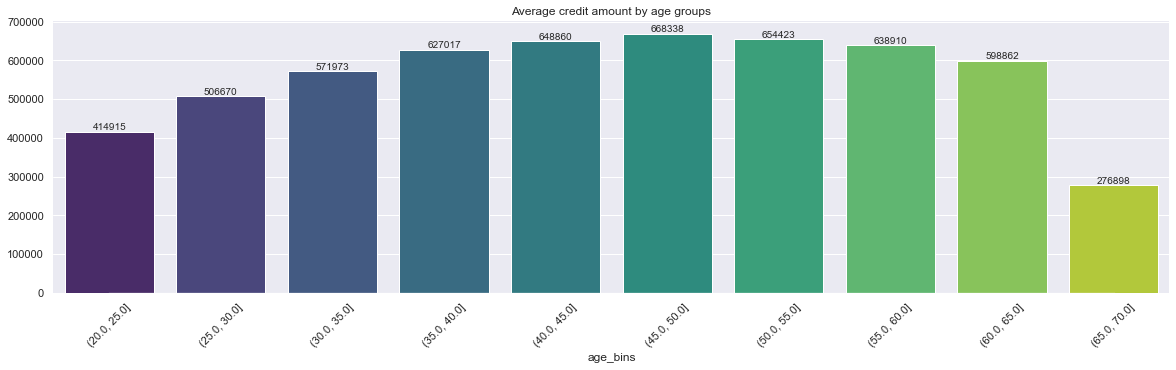

In [ ]:
h.plot_barplot(age_credit, "mean", "Average credit amount by age groups", (20, 5))

* Very clear difference of credit amount is by the age groups: we can see a quite obvious linear relationship, when the age of borrower rises (from 20 to 50) the average credit amount increases, from 50 years it starts to decrease (obviously as people get retired, their financial and health situation is worse in the age from 50 years).

* **Inferential statistical analysis:**

**Research question**
When considering people, who had no problem with loan repayments and loan defaulters, is the difference in means of loan amount in these two groups statistically significant? (hypothesis test comparing means of two independent populations)

**Population**: all loan receivers.

**Population subgroups**: 
1. non defaulters borrowers;

2. loan defaulters.

**Parameter of Interest**: difference in population subgroups mean loan amount.

**Power of the test** ($1 - \beta$) - 0.8 as a convention.

**Significance level**: 0.05

**Null Hypothesis:** H(O): $\mu$ (1) -$\mu$ (2) = 0

**Alternative Hypothesis:** $\mu$ (1) - $\mu$ (2) > 0

This will be a *one tail* testing.


In [ ]:
inferent_statist_amt_means = h.DiffMeans(cleaned_train_df, "target", "amt_credit")

In [ ]:
inferent_statist_amt_means.make_populations()

In [ ]:
inferent_statist_amt_means.make_table()

,count,mean,std
target,,,
0,282686,602648.28,406845.91
1,24825,557778.53,346433.24


**Assumptions**:
1. I assume that those are simple random samples. Samples are independent one from each other.
2. The distributions of credit amount of both subpopulations doesn't seem normal, both are skewed to the right, but there are more than 300k observations per both data sets, so accounting on Central limit theorem, I still proceed the z-testing.
3. I assume that the standard deviations of these two populations are not similar, it differ up to 50k. That's why I use the unpooled approach.

The difference of these two means is:

In [ ]:
inferent_statist_amt_means.diff_of_means()

44869.754328222596

* Required sample size to avoid p-hacking in each of the populations:
The same with this [calculator](https://www.stat.ubc.ca/~rollin/stats/ssize/n2)

In [ ]:
inferent_statist_amt_means.sample_size_needed()

Required sample size:877


We have a lot bigger sample sizes, so p-hacking should be avoid.

In [ ]:
inferent_statist_amt_means.z_statistics("unequal")

Z-statistic: 19.273, p-value: 0.0


To conclude, the z - statistics:  19.27, so the difference between sample means of credit amount, are above the hypothesized 0 value by more than 19 estimated standard errors, thats a lot. The p-value is actually equal to zero and is definitely smaller than the alpha of 0.05. So, there's enough evidence to reject the NULL hypothesis. The difference of the means of credit amounts is significantly higher in the group of non defaulters. So from data we have, can be concluded that, people, payed credit in time and without problems, statistically on average got bigger loans.

* Confidence interval of the difference between two means of loan amount.
1. Confidence level of 95%.
2. Significant level alpha = 0.05
3. Unpooled approach.

In [ ]:
inferent_statist_amt_means.conf_interval_of_difference("unequal")

(40306.597593441016, 49432.911063004176)


From confidence interval we see that the difference in means of credit amount between target groups is from 40306.59 to 49432.91 and 0 is not in that interval.

#### **3.2.2. Annuity amount**

An annuity is a loan with a monthly repayment, which is always the same amount. In other words you pay each month the same sum. This annuity payment consists of both interest and principal repayment. The composition of interest and repayment changes slightly with each month, [more about this here](https://hypofriend.de/en/annuitaetendarlehen.fhd). It's like monthly payment.

In [ ]:
cleaned_train_df.groupby("target")["amt_annuity"].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,282674.00,27163.62,14658.31,1615.50,16456.50,24876.00,34749.00,258025.50
1,24825.00,26481.74,12450.68,2722.50,17361.00,25263.00,32976.00,149211.00


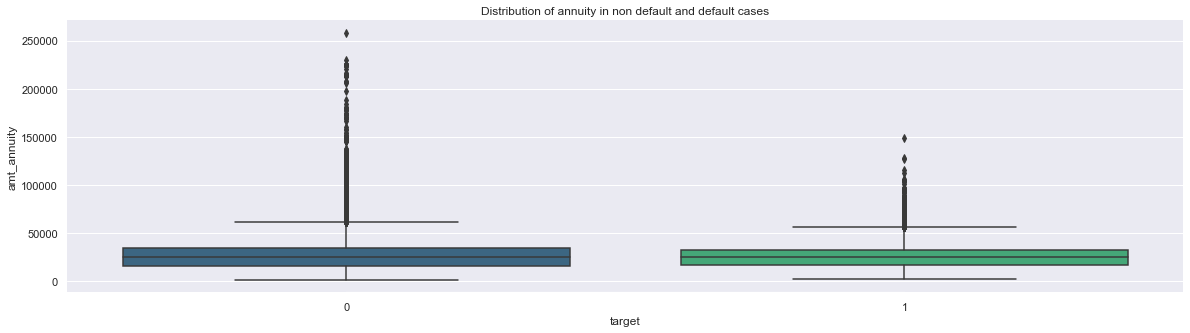

In [ ]:
h.plot_boxplot(cleaned_train_df, "target", "amt_annuity", "Distribution of annuity in non default and default cases")

The distributions of annuity amount are quite similar in both target groups, there is no clear separation between them. The minimum annuity amount is smaller and the maximum annuity amount is larger in the non defaulter group, but the mean is quite similar in both cases.
I assume that here we can also observe the rise of the annuity amount by age groups.

In [ ]:
age_annuity = cleaned_train_df.groupby("age_bins")["amt_annuity"].agg(["count", "mean", "std"])

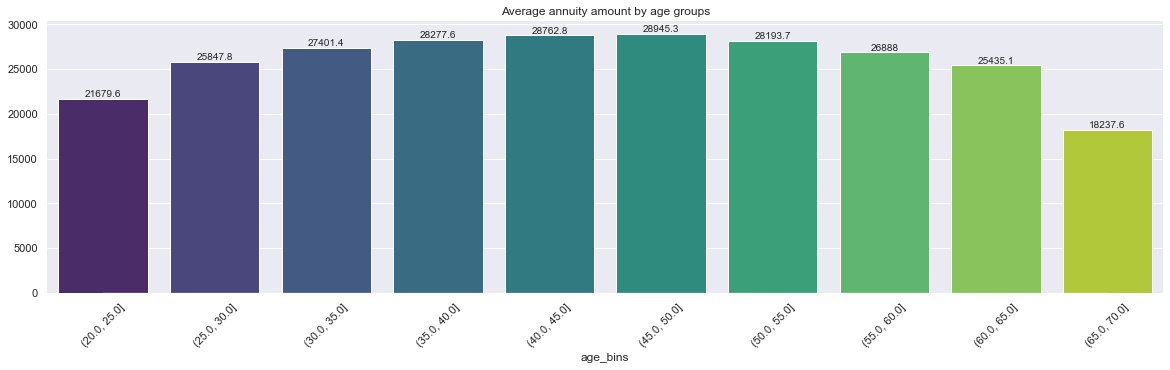

In [ ]:
h.plot_barplot(age_annuity, "mean", "Average annuity amount by age groups", (20, 5))

Yes the same situation is here, when we have the same situation: the average annuity amount gets higher with the age rise up to 50 years of age and then starts to drop.

In [ ]:
# Filling NaN's.
cleaned_train_df["amt_annuity"] = cleaned_train_df["amt_annuity"].fillna(
    cleaned_train_df.groupby(["age_bins"])["amt_annuity"].transform("mean")
)

#### **3.2.3. Goods price**

For consumer loans it is the price of the goods for which the loan is given

In [ ]:
cleaned_train_df.amt_goods_price.isna().sum()

278

So only 278 contracts were given not to buy some kind of goods. Let's see what is the credit amount in this type of loans.

In [ ]:
zero_good_price = cleaned_train_df[cleaned_train_df["amt_goods_price"].isnull() == True]
zero_good_price.groupby("target")["amt_credit"].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,257.00,282081.71,192619.80,135000.00,180000.00,225000.00,270000.00,1350000.00
1,21.00,249642.86,153248.75,135000.00,180000.00,202500.00,270000.00,855000.00


Non consumer loans were quite big, from 135000 to even 1350000, mean in target groups differ and is smaller (about 250 k) in defaulters group, about 282k in non defaulters group. The same tendency when non defaulters credit amount is on average higher.

In [ ]:
cleaned_train_df.groupby("target")["amt_goods_price"].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,282429.00,542736.80,373785.49,40500.00,238500.00,450000.00,688500.00,4050000.00
1,24804.00,488972.41,311636.50,45000.00,238500.00,450000.00,675000.00,3600000.00


We can see that the mean of goods price and maximum price is larger in non defaulters group, but thats normal, as the same situation is with total credit amount too.

* Let's see is the loan amount equal to the goods price?

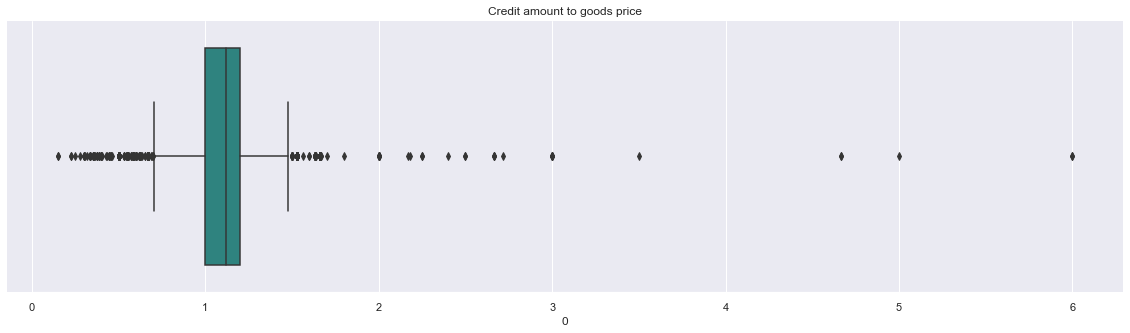

In [ ]:
non_zero_good_price = cleaned_train_df[cleaned_train_df["amt_goods_price"].isnull() == False]
credit_to_good_price = pd.DataFrame(non_zero_good_price["amt_credit"] / non_zero_good_price["amt_goods_price"])
h.plot_boxplot(credit_to_good_price, 0, None, "Credit amount to goods price")

We can see that mostly credits had the amount which is similar to the goods price, but there are some outliers too, when the credit amount was much larger than the goods price. So the borrowers got much larger credits than the goods price, maybe some additional expenses were included.

In [ ]:
# Goods price I will fill the NaN's in goods price with 0, as these loan probably were taken not to buy some kind of goods.
cleaned_train_df["amt_goods_price"].fillna(0, inplace=True)
cleaned_train_df["amt_goods_price"].isna().sum()

0

#### **3.2.4. Type of credit contract**


**A revolving loan** facility is a form of credit issued by a financial institution that provides the borrower with the ability to draw down or withdraw, repay, and withdraw again. A revolving loan is considered a flexible financing tool due to its repayment and re-borrowing accommodations. It is not considered a term loan because, during an allotted period of time, the facility allows the borrower to repay the loan or take it out again. In contrast, a term loan provides a borrower with funds followed by a fixed payment schedule, [more on this here](https://www.investopedia.com/terms/r/revolving-loan-facility.asp#:~:text=A%20revolving%20loan%20facility%20is,repayment%20and%20re%2Dborrowing%20accommodations.).

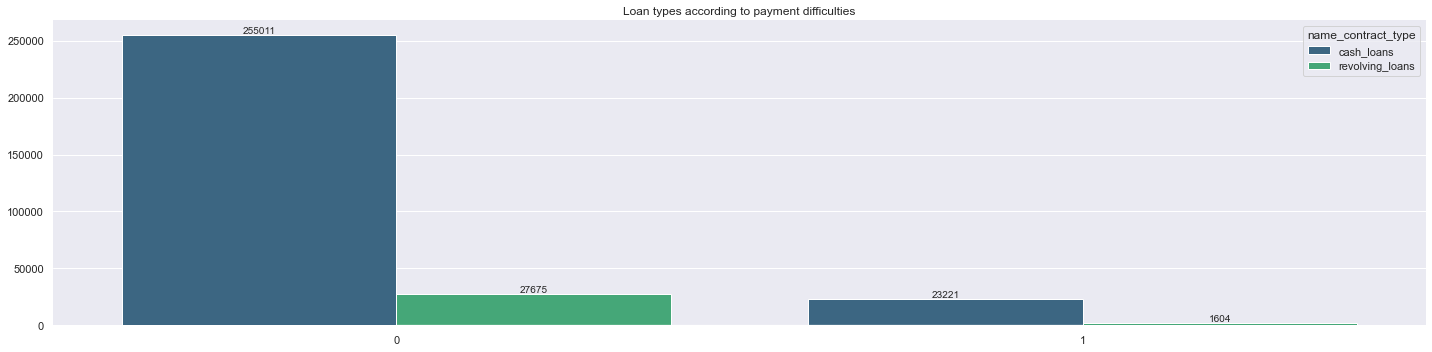

In [ ]:
h.plot_countplot(
    cleaned_train_df,
    "target",
    "name_contract_type",
    "Loan types according to payment difficulties",
    (20, 5),
)

In [ ]:
h.make_crosstab_percent(cleaned_train_df, "target", "name_contract_type")

name_contract_type,cash_loans,revolving_loans
target,,
0,90.21,9.79
1,93.54,6.46


The majority of repayment problem arise in cash loans - 93.54% and in revolving loans - 6.46%. If the total proportion of revolving loans were 10 percent, here we see that problem in repayment had less people with revolving loans - almost 6.5 percent. 

#### **3.2.5. Weekday and hour of the approval process start**

In [ ]:
weekday = (
    h.make_crosstab_percent(cleaned_train_df, "weekday_appr_process_start", "target")
    .round(2)
    .reset_index()
)
h.plot_stacked_barchart_plotly(
    weekday,
    "weekday_appr_process_start",
    [0, 1],
    "Percentage of start of loan approval processes by weekday",
    "Loan defaults:",
)

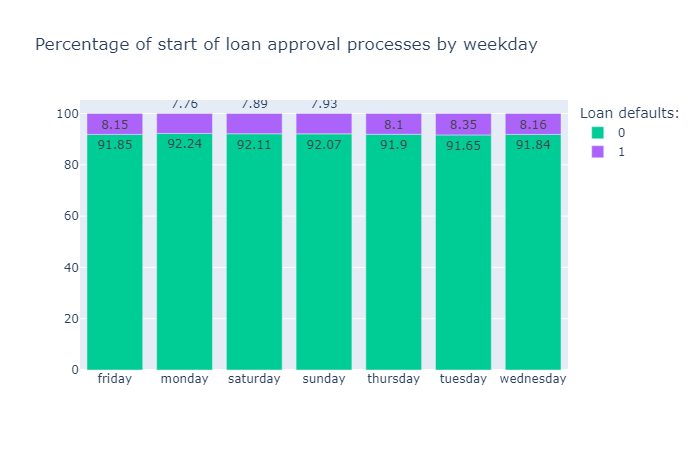

In [2]:
# If plotly doesn't show a chart, here it is.
Image(filename="png_files\weekday.png")

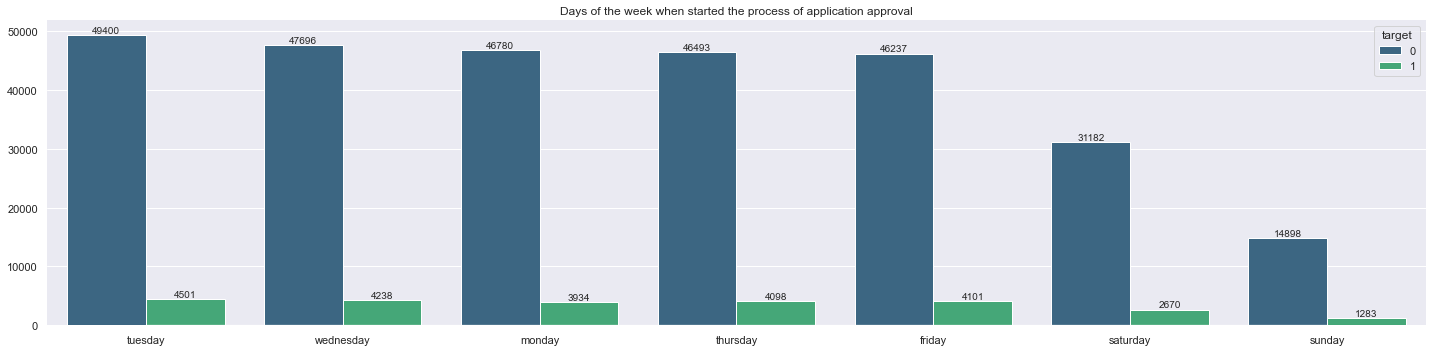

In [ ]:
h.plot_countplot(
    cleaned_train_df,
    "weekday_appr_process_start",
    "target",
    "Days of the week when started the process of application approval",
    (20, 5)
)

End of the week seems to have the lowest number of loan applications in total, that's normal as it is not working days of traditional not internet based) banking institutions. We can see that in target groups percentage of default cases, according to weekday of the loan process start is very similar - about 8 percent. So no obvious distinction. Let's see if hours have some sense.

In [ ]:
hours = (
    h.make_crosstab_percent(cleaned_train_df, "hour_appr_process_start", "target")
    .round(2)
    .reset_index()
)
h.plot_stacked_barchart_plotly(
    hours,
    "hour_appr_process_start",
    [0, 1],
    "Percentage of start of loan approval processes by hours",
    "Loan defaults:",
)

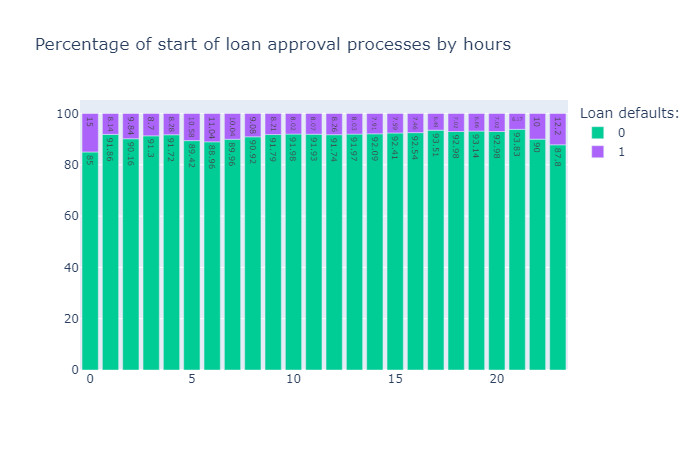

In [3]:
# If plotly doesn't show a chart, here it is.
Image(filename="png_files\hours.png")

Interesting fact, that people, who started the loan application process late in the evening from 22 to 24 pm and in early morning from 5 am to 7 am have a slightly higher percentage of default from 10 to 15 percent.

#### **3.2.6. Scores from external sources**
EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3 - from the description it's normalized score from external data source. It is some kind of "risk score", gotten about the applicant from external sources and normalized.

In [ ]:
ext_df = cleaned_train_df[["ext_source_1", "ext_source_2", "ext_source_3", "target"]]

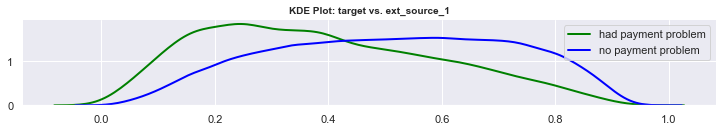

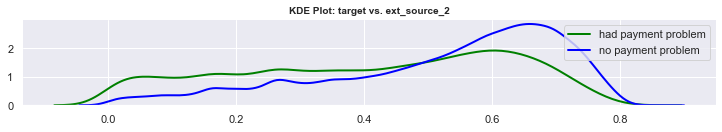

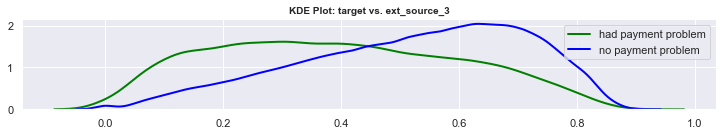

In [ ]:
h.multiple_kde(ext_df, "target")

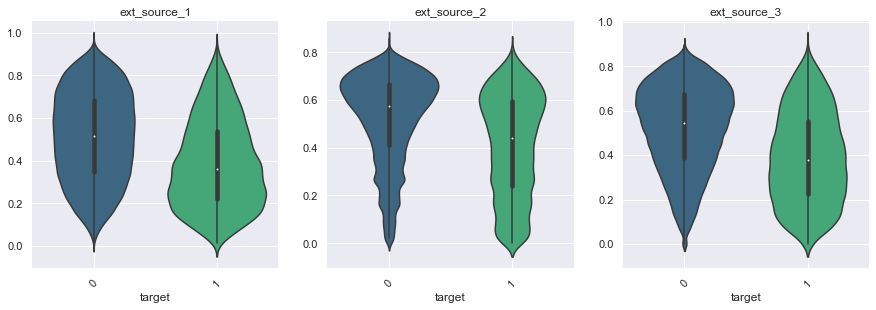

In [ ]:
h.multiple_violinplots(ext_df, "target")

Seems that the third ext_source divides these default and non default cases best, even medians are very different in all the ext_source features. Loan default cases seems to have lover medians of all these features. Ext_source_1 shows that more people, who had defaulted their loans, had lower score in this features and the distribution is skewed to the right. Ext_source_2 distributions doesn't look so different. And the third ext_source distribution looks like dividing default and non default cases best.

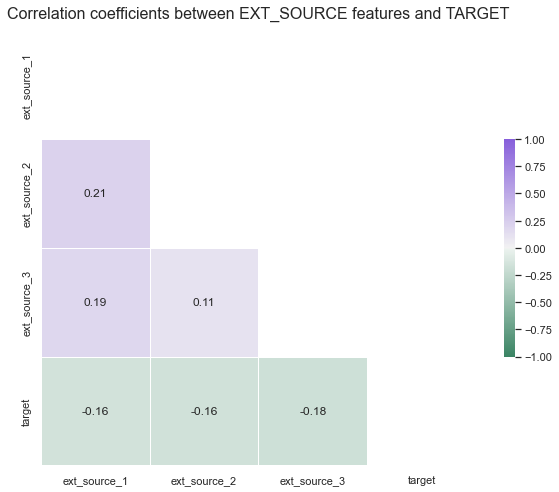

In [ ]:
h.plot_heatmap(ext_df, "Correlation coefficients between EXT_SOURCE features and TARGET")

ext_source_3 is mostly negatively correlated with the target, but still it reaches only -0.18, all three features are correlated with each other positively to, but this correlation is still very weak and will not cause Multicollinearity in models. All three of them can be used together and still they are not totally independent with each other, but according to the correlation coefficients, bring quite different information.

In [ ]:
cleaned_train_df.groupby("target")["ext_source_1", "ext_source_2", "ext_source_3"].describe()

ext_source_1                                    ext_source_2            \
              count mean  std  min  25%  50%  75%  max        count mean  std   
target                                                                          
0         124079.00 0.51 0.21 0.01 0.35 0.52 0.68 0.96    282078.00 0.52 0.19   
1          10054.00 0.39 0.20 0.01 0.22 0.36 0.54 0.93     24773.00 0.41 0.21   

                                ext_source_3                                \
        min  25%  50%  75%  max        count mean  std  min  25%  50%  75%   
target                                                                       
0      0.00 0.41 0.57 0.67 0.85    227398.00 0.52 0.19 0.00 0.39 0.55 0.67   
1      0.00 0.24 0.44 0.59 0.81     19148.00 0.39 0.21 0.00 0.22 0.38 0.55   

             
        max  
target       
0      0.89  
1      0.90

The mean in all three features, according to the target, differs a lot, but the largest difference is in the ext_source_3, which seems to divide non default and default cases best. Let's see is it statistically significant.

* **Inferential statistical analysis:**

**Research question**
When considering people, who had no problem with loan repayments and loan defaulters, is the difference in means of ext_source_3 measure in these two groups statistically significant? (hypothesis test comparing means of two independent populations)

**Population**: all loan receivers.

**Population subgroups**: 
1. non defaulters borrowers;

2. loan defaulters.

**Parameter of Interest**: difference in population subgroups mean loan amount.

**Power of the test** ($1 - \beta$) - 0.8 as a convention.

**Significance level**: 0.05

**Null Hypothesis:** H(O): $\mu$ (1) -$\mu$ (2) = 0

**Alternative Hypothesis:** $\mu$ (1) - $\mu$ (2) > 0

This will be a *one tail* testing.


In [ ]:
inf_ext_source_3 = cleaned_train_df[cleaned_train_df["ext_source_3"].isnull() == False]

In [ ]:
inferent_statist_ext_means = h.DiffMeans(inf_ext_source_3, "target", "ext_source_3")

In [ ]:
inferent_statist_ext_means.make_populations()

In [ ]:
inferent_statist_ext_means.make_table()

,count,mean,std
target,,,
0,227398,0.52,0.19
1,19148,0.39,0.21


**Assumptions**:
1. I assume that those are simple random samples. Samples are independent one from each other.
2. The distributions of ext_sourvce_3 of both subpopulations doesn't seem normal, non defaulters group ext_source_3 is skewed to the right, defaulter: more normally distributed, but there are more than 240k observations per both data sets, so accounting on Central limit theorem, I still proceed the z-testing.
3. I assume that the standard deviations of these two populations differs. That's why I use the unpooled approach.

The difference of these two means is:

In [ ]:
inferent_statist_ext_means.diff_of_means()

0.13025236803708135

* Required sample size to avoid p-hacking in each of the populations:
The same with this [calculator](https://www.stat.ubc.ca/~rollin/stats/ssize/n2)

In [ ]:
inferent_statist_ext_means.sample_size_needed()

Required sample size:29


We have a lot bigger sample sizes, so p-hacking should be avoid.

In [ ]:
inferent_statist_ext_means.z_statistics("unequal")

Z-statistic: 84.578, p-value: 0.0


To conclude, the z - statistics:  84,6, so the difference between sample means of ext_source_3 are above the hypothesized 0 value by more than 84 estimated standard errors, thats a lot. The p-value is actually equal to zero and is definitely smaller than the alpha of 0.05. So, there's enough evidence to reject the NULL hypothesis. The difference of the means of ext_source_3 is significantly higher in the group of non defaulters. So from data we have, can be concluded that, people, payed credit in time and without problems, statistically on average had higher normalized score of ext_source_3.

* Confidence interval of the difference between two means of loan amount.
1. Confidence level of 95%.
2. Significant level alpha = 0.05
3. Unpooled approach.

In [ ]:
inferent_statist_ext_means.conf_interval_of_difference("unequal")

(0.12723381998503053, 0.13327091608913016)


From confidence interval we see that the difference in means of ext_source_3 between target groups is from 0.127 to 0.133 and 0 is not in that interval. 

So can be concluded, that the difference in means of all ext_source features by the target groups is statistically significant. In the non defaulters group borrowers had on average higher these ext_source values, than in the defaulters group.

* Differencies by age_bins.

In [ ]:
age_source = cleaned_train_df.groupby("age_bins")[["ext_source_1", "ext_source_2", "ext_source_3"]].describe()
age_source

ext_source_1                                    ext_source_2  \
                    count mean  std  min  25%  50%  75%  max        count   
age_bins                                                                    
(20.0, 25.0]      6707.00 0.28 0.15 0.02 0.17 0.25 0.37 0.87     12125.00   
(25.0, 30.0]     19250.00 0.35 0.17 0.01 0.21 0.32 0.46 0.91     32798.00   
(30.0, 35.0]     23330.00 0.41 0.18 0.01 0.27 0.39 0.54 0.91     39377.00   
(35.0, 40.0]     23335.00 0.48 0.18 0.02 0.35 0.47 0.61 0.93     42783.00   
(40.0, 45.0]     19622.00 0.54 0.18 0.02 0.41 0.54 0.67 0.93     41314.00   
(45.0, 50.0]     14134.00 0.59 0.17 0.02 0.49 0.61 0.72 0.93     35081.00   
(50.0, 55.0]     11616.00 0.65 0.16 0.02 0.55 0.67 0.77 0.94     34868.00   
(55.0, 60.0]      9020.00 0.70 0.15 0.04 0.63 0.72 0.80 0.94     33032.00   
(60.0, 65.0]      5881.00 0.73 0.14 0.03 0.67 0.76 0.83 0.96     27388.00   
(65.0, 70.0]      1238.00 0.77 0.12 0.06 0.73 0.81 0.85 0.95      8085.00   

                                                ext_source_3                 \
             mean  std  min  25%  50%  75%  max        count mean  std  min   
age_bins                                                                      
(20.0, 25.0] 0.42 0.20 0.00 0.27 0.45 0.59 0.85      7964.00 0.37 0.18 0.00   
(25.0, 30.0] 0.47 0.20 0.00 0.34 0.52 0.63 0.85     24985.00 0.44 0.19 0.00   
(30.0, 35.0] 0.50 0.19 0.00 0.38 0.55 0.65 0.85     31749.00 0.48 0.20 0.00   
(35.0, 40.0] 0.52 0.19 0.00 0.41 0.57 0.67 0.85     35135.00 0.50 0.20 0.00   
(40.0, 45.0] 0.53 0.18 0.00 0.43 0.58 0.67 0.85     34131.00 0.52 0.19 0.00   
(45.0, 50.0] 0.54 0.18 0.00 0.44 0.59 0.67 0.85     28549.00 0.53 0.19 0.00   
(50.0, 55.0] 0.54 0.18 0.00 0.43 0.59 0.68 0.85     28319.00 0.54 0.19 0.00   
(55.0, 60.0] 0.53 0.19 0.00 0.41 0.58 0.67 0.85     27190.00 0.54 0.19 0.00   
(60.0, 65.0] 0.51 0.19 0.00 0.38 0.57 0.67 0.82     22245.00 0.56 0.18 0.00   
(65.0, 70.0] 0.51 0.20 0.00 0.36 0.57 0.67 0.81      6279.00 0.61 0.17 0.00   

                                  
              25%  50%  75%  max  
age_bins                          
(20.0, 25.0] 0.24 0.37 0.51 0.83  
(25.0, 30.0] 0.30 0.45 0.60 0.88  
(30.0, 35.0] 0.33 0.50 0.64 0.89  
(35.0, 40.0] 0.36 0.53 0.66 0.88  
(40.0, 45.0] 0.38 0.55 0.67 0.89  
(45.0, 50.0] 0.39 0.55 0.68 0.88  
(50.0, 55.0] 0.40 0.57 0.69 0.89  
(55.0, 60.0] 0.41 0.57 0.68 0.89  
(60.0, 65.0] 0.45 0.60 0.71 0.90  
(65.0, 70.0] 0.50 0.65 0.74 0.88

We can see thats on average ext_source values are linearly correlated with age, when age is getting higher, the ext_source values on average gets higher too.

So it is more logical to fill NaN by age_bins, as the values of all ext_source cases differ by age bins quite more and could be more accurate, than overall median or mean.

In [ ]:
# Filling NaN's by age bins mean.
cleaned_train_df["ext_source_1"] = cleaned_train_df["ext_source_1"].fillna(
    cleaned_train_df.groupby(["age_bins"])["ext_source_1"].transform("mean")
)

cleaned_train_df["ext_source_2"] = cleaned_train_df["ext_source_2"].fillna(
    cleaned_train_df.groupby(["age_bins"])["ext_source_2"].transform("mean")
)

cleaned_train_df["ext_source_3"] = cleaned_train_df["ext_source_3"].fillna(
    cleaned_train_df.groupby(["age_bins"])["ext_source_3"].transform("mean")
)

#### **3.2.7. Loan type**

Individual or joint loan.

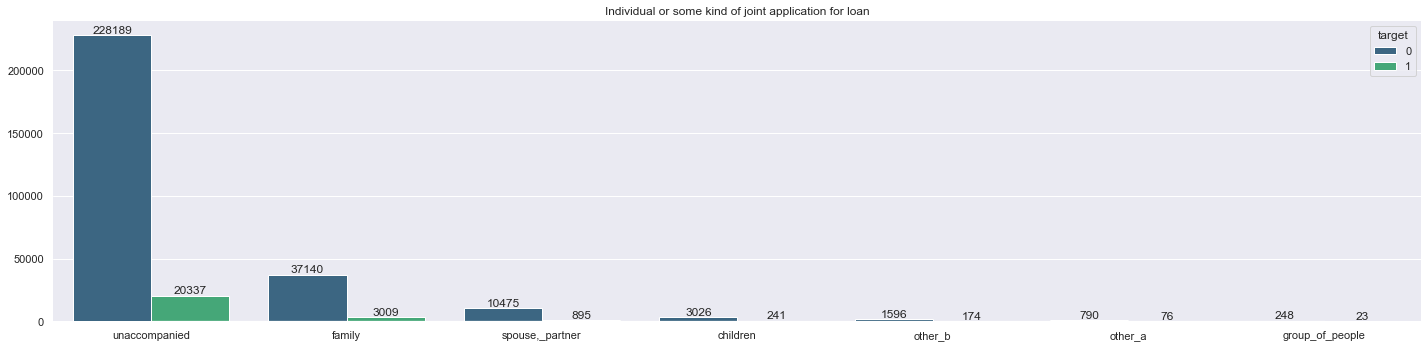

In [ ]:
h.plot_countplot(
    cleaned_train_df,
    "name_type_suite",
    "target",
    "Individual or some kind of joint application for loan",
    (20, 5)
)

I'll lower down the number of possible outcomes to: unaccompanied, family, other and unknown for NaN's.

In [ ]:
cleaned_train_df["name_type_suite"].fillna("unknown", inplace=True)
cleaned_train_df["name_type_suite"].isna().sum()

0

In [ ]:
cleaned_train_df.loc[cleaned_train_df["name_type_suite"] == "spouse,_partner", "name_type_suite"] = "family"
cleaned_train_df.loc[cleaned_train_df["name_type_suite"] == "children", "name_type_suite"] = "family"
cleaned_train_df.loc[cleaned_train_df["name_type_suite"] == "other_a", "name_type_suite"] = "other"
cleaned_train_df.loc[cleaned_train_df["name_type_suite"] == "other_b", "name_type_suite"] = "other"
cleaned_train_df.loc[cleaned_train_df["name_type_suite"] == "group_of_people", "name_type_suite"] = "other"

In [ ]:
h.make_crosstab_percent(cleaned_train_df, "target", "name_type_suite")

name_type_suite,family,other,unaccompanied,unknown
target,,,,
0,17.91,0.93,80.72,0.43
1,16.70,1.10,81.92,0.28


Percentage of all outcomes is very similar on both non default and default groups. No significant difference. 

### **3.3. Main personal information about the borrower**

#### **3.3.1. Gender**

In [ ]:
cleaned_train_df.code_gender.value_counts()

f      202448
m      105059
xna         4
Name: code_gender, dtype: int64

Dropping the xna values, as there are only 4 of them.

In [ ]:
cleaned_train_df = cleaned_train_df[cleaned_train_df.code_gender != "xna"]

66 percent of loan receivers are female, 34 percent - male.

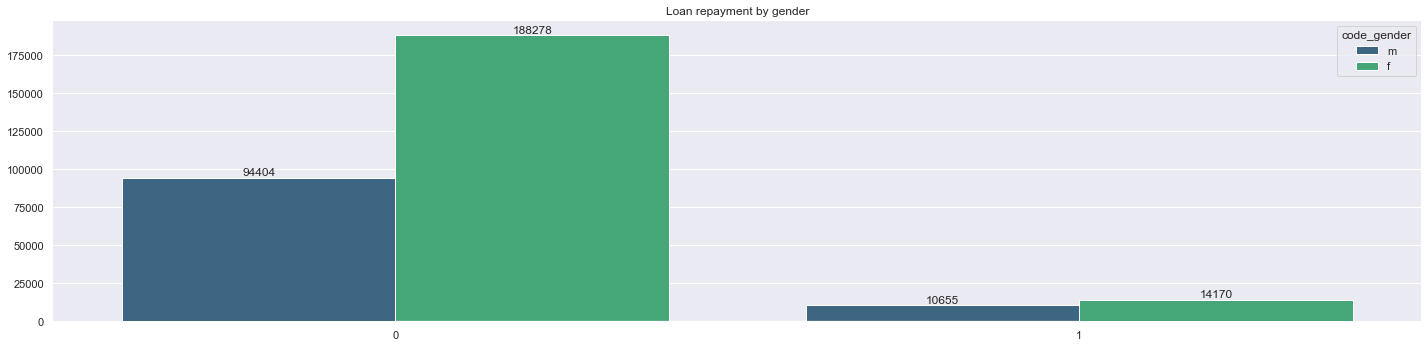

In [ ]:
h.plot_countplot(
    cleaned_train_df, "target", "code_gender", "Loan repayment by gender", (20, 5)
)

In [ ]:
gender_defaults = h.make_crosstab_percent(cleaned_train_df, "target", "code_gender",).reset_index()
h.plot_stacked_barchart_plotly(gender_defaults, "target", ["f", "m"], "Percentage of defaults and non defaults by gender", "Gender:")

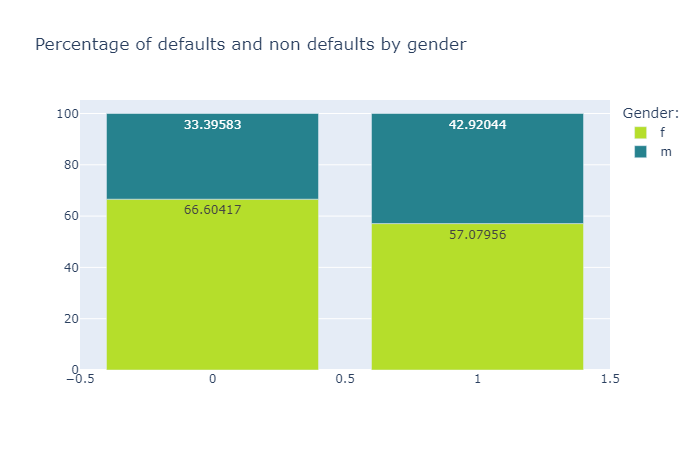

In [4]:
# If plotly doesn't show a chart, here it is.
Image(filename="png_files\gender.png")

All in all seems that male tend to have more problem with loan repayment, as they exceed from 34 (in total proportion of all loan receivers) to almost 42 percent in the group of problematic payers.

#### **3.3.2. Age, age bins**

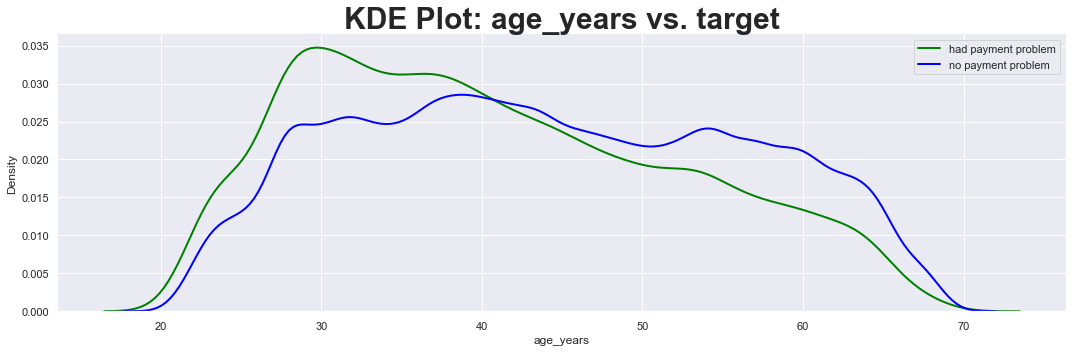

In [ ]:
h.plot_kde(cleaned_train_df, "age_years", "target")

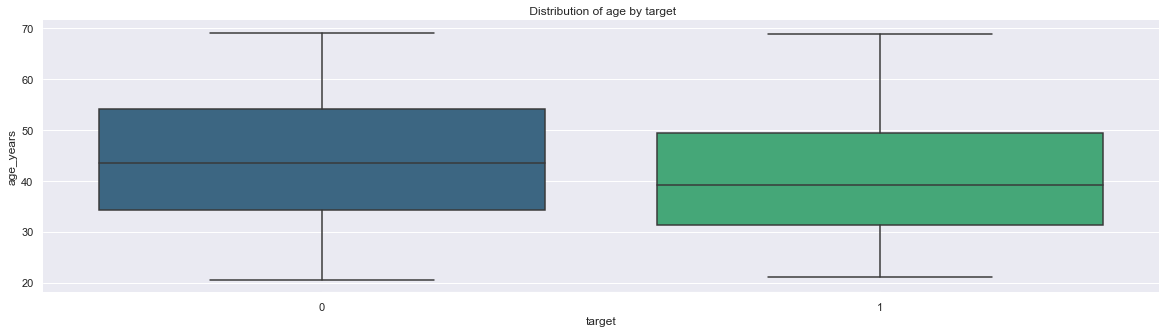

In [ ]:
h.plot_boxplot(cleaned_train_df, "target", "age_years", " Distribution of age by target")

Seems that younger of age (until ~38) receivers had more problem with repayment, and older people (over 55) seems more robust and has less problem with repayment. The mean and median of age is lower in the defaulters group.

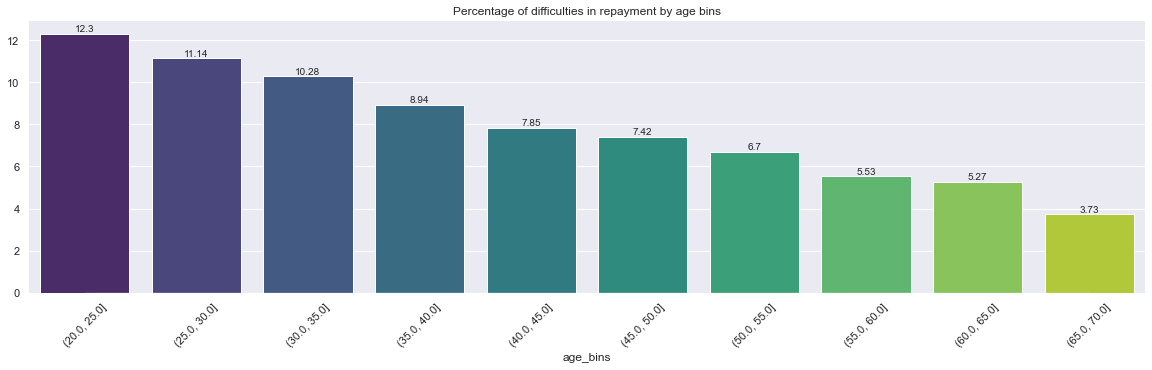

In [ ]:
age_groups_repayment  = pd.DataFrame(cleaned_train_df.groupby("age_bins")["target"].mean()*100).round(2)
h.plot_barplot(age_groups_repayment, "target", "Percentage of difficulties in repayment by age bins", (20,5))

We can obviously see that by each 5 year the percentage of defaulted persons is decreasing. So the age of loan receivers can indicate the bigger possibility of default. On the other hand younger people shouldn't be discriminated, maybe some additional information about them should be selected, maybe it could be decided about other interest rate by age also.

### **3.3.3. Type of education**

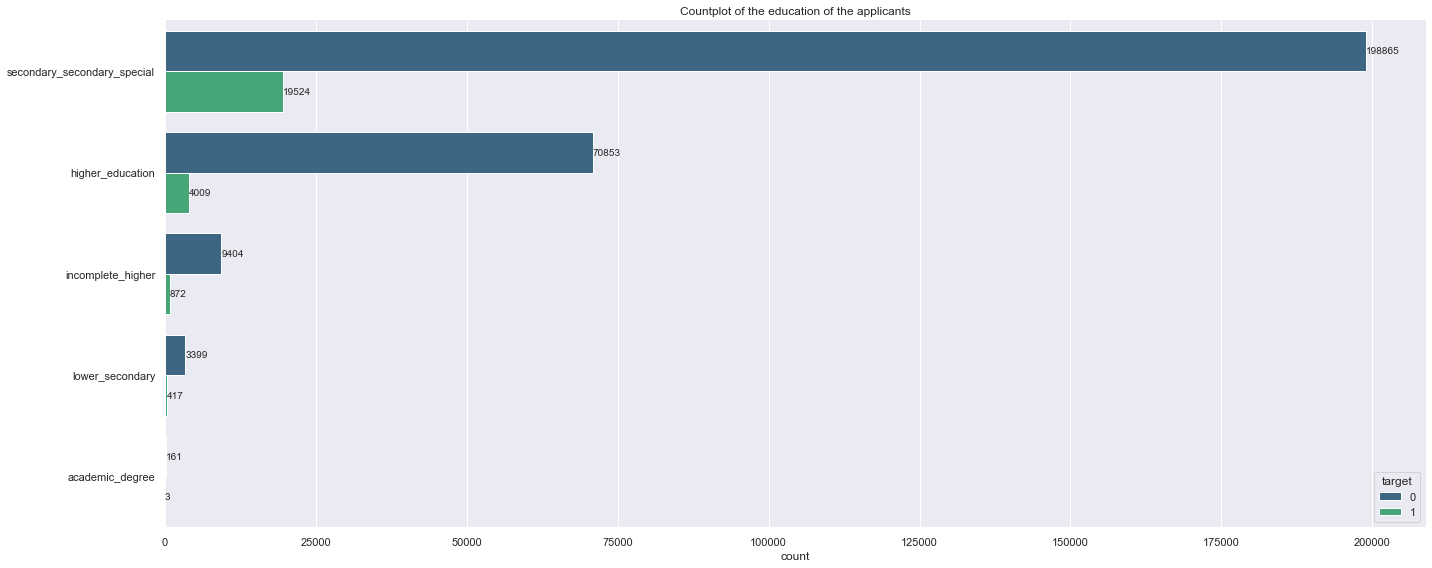

In [ ]:
h.plot_countplot_vertical(
    cleaned_train_df,
    "name_education_type",
    "target",
    "Countplot of the education of the applicants",
    (20,8)
)

The majority of loan receivers had secondary education, then goes higher, incomplete higher, lower secondary education. Let's see by percentage are the any difference in the non defaulters and defaulters.

In [ ]:
education_percentage = h.make_crosstab_percent(cleaned_train_df, "name_education_type", "target").reset_index()
h.plot_stacked_barchart_plotly(education_percentage, "name_education_type", [0,1], "Percentage of (non)defaulters by education type", "Defaulters:")

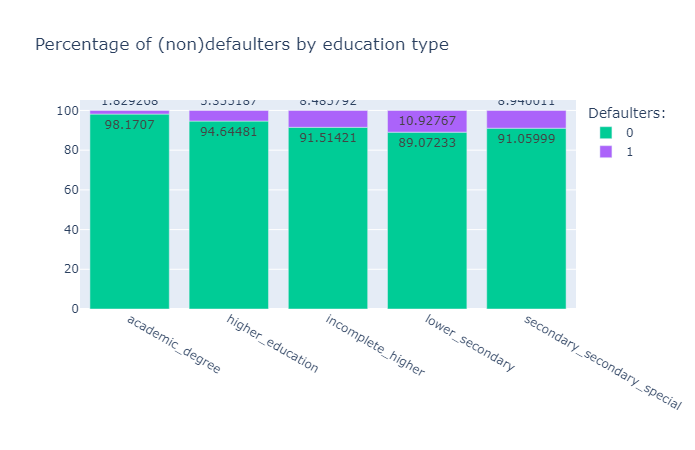

In [5]:
# If plotly doesn't show a chart, here it is.
Image(filename="png_files\educatiion.png")

The highest percentage of defaulters (over 10 percent) is in the lower secondary education and people with academic degree are very rare in loan defaults. It could be considered, that the higher the education of the receiver, the lower the possibility him to default. And obviously it is related with age again, older people tend to have higher education.

#### **3.3.4. Real estate, living/housing conditions**

1. Own realty.

In [ ]:
realty = h.make_crosstab_percent(cleaned_train_df, "flag_own_realty", "target").reset_index()
h.plot_stacked_barchart_plotly(realty, "flag_own_realty", [0,1], "Percentage of defaulters in each realty group", "Defaulters")

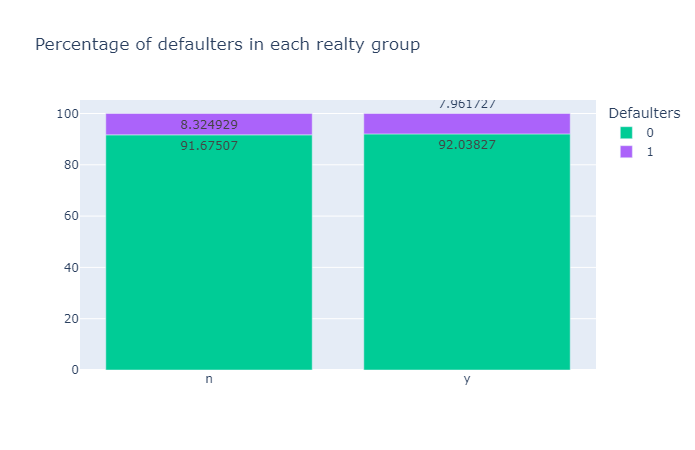

In [7]:
# If plotly doesn't show a chart, here it is.
Image(filename="png_files\\realty.png")

Numbers are very similar, almost no difference in these two groups of "payers" and "non_payers", about 69 percent in both have their own house of flat. And in each group of realty (non)owners about 8 percent of people are defaulters.

2. Housing type.

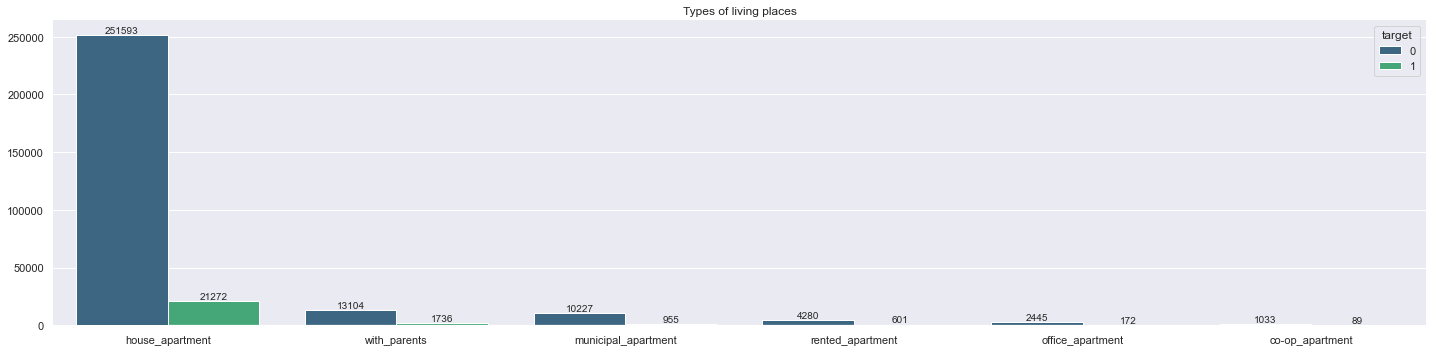

In [ ]:
h.plot_countplot(cleaned_train_df, "name_housing_type", "target", "Types of living places", (20,5))

Mostly borrowers live in house/apartment.
Let's see are there any interesting cases when owns realty and stated that lives in other types (like rented).

* **New feature**.

There are interesting numbers, when people say, that they own some kind of real estate, but on the other hand that they live in rented/office/municipal/co-op apartment. Let's "flag" only those, who have realty and live in house/apartment, that would indicate, that these people for sure have valuable livable real estate and they use it at the moment.

In [ ]:
def living_in_own_apart_feature(cleaned_train_df) : 
    if (cleaned_train_df["flag_own_realty"] == "y") & (cleaned_train_df["name_housing_type"] == "house_apartment") : 
        return 1
    else : 
        return 0

cleaned_train_df["living_in_owning_realty"] = cleaned_train_df.apply(lambda x : living_in_own_apart_feature(x),axis=1)

In [ ]:
h.make_crosstab_percent(cleaned_train_df, "living_in_owning_realty", "target")

target,0,1
living_in_owning_realty,,
0,91.47,8.53
1,92.18,7.82


Still there is no real difference by the target groups, but I think this feature could be more accurate in the meaning of owning living place.

3. Rating of the region client lives in.

In [ ]:
feature_description[feature_description["Row"] == "REGION_RATING_CLIENT_W_CITY"]["Description"].to_list()


['Our rating of the region where client lives with taking city into account (1,2,3)']

In [ ]:
region = h.make_crosstab_percent(cleaned_train_df, "region_rating_client_w_city", "target").reset_index()
h.plot_stacked_barchart_plotly(region, "region_rating_client_w_city", [0,1], "Percentage of (non)defaulters by region rating they live in", "Defaulters:")

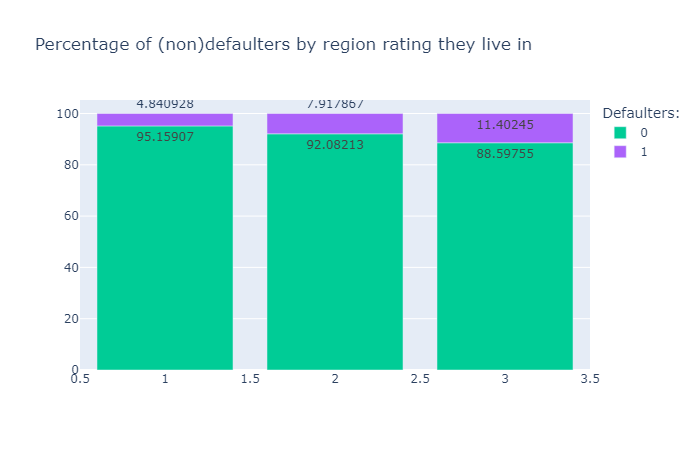

In [8]:
# If plotly doesn't show a chart, here it is.
Image(filename="png_files\\region.png")

We can conclude that in the "defaulter" group even  11.4 percent of people were living in the region with rating 3. Seems that the lower the rating, given to the region, the better(or more reliable) this region is. From the first region we have 4.84 percent of defaulters, from the second - 7.92 and from the third - 11.4 percent.

#### **3.3.5. Family information**

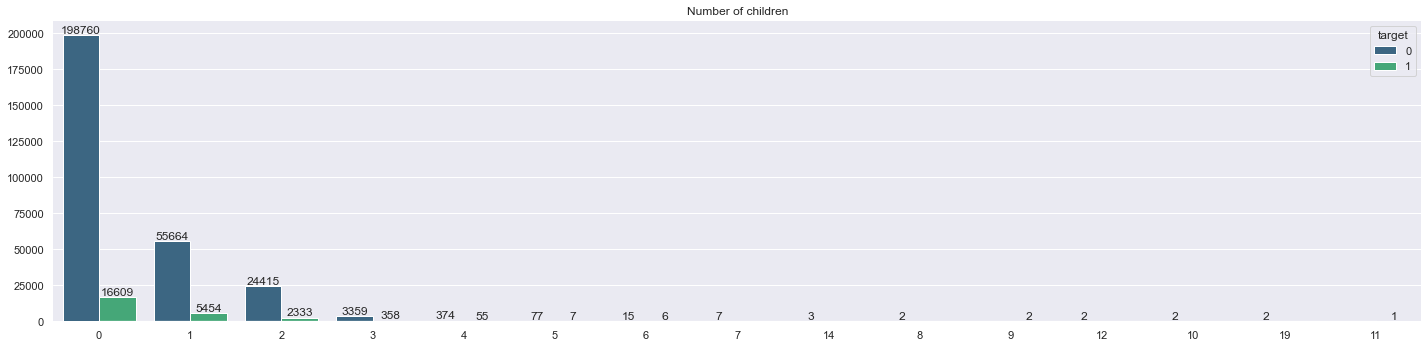

In [ ]:
h.plot_countplot(cleaned_train_df, "cnt_children", "target", "Number of children", (20,5))

Situation is very similar in both groups, mostly people, who got loans, had no children, then goes 1, 2 or 3 in both groups very similarly. Seems that number of children do not affect loan repayment.

* Family status

In [ ]:
family_status = h.make_crosstab_percent(cleaned_train_df, "target", "name_family_status").reset_index()
h.plot_stacked_barchart_plotly(family_status, "target", ["civil_marriage",	"married",	"separated",	"single_not_married",	"unknown",	"widow"], "Percentage of different borrowers family status by (non)defaulters", "Family_status:")

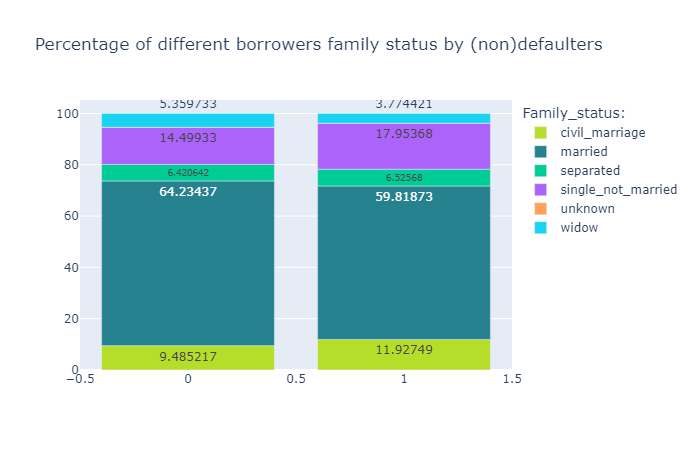

In [9]:
# If plotly doesn't show a chart, here it is.
Image(filename="png_files\\family.png")

Most of the borrowers are either married or single. In the defaulters group we see larger percentage of borrowers with civil marriage and single, lower - marriage (than in non defaulters).

#### **3.3.6. Income, working situation**

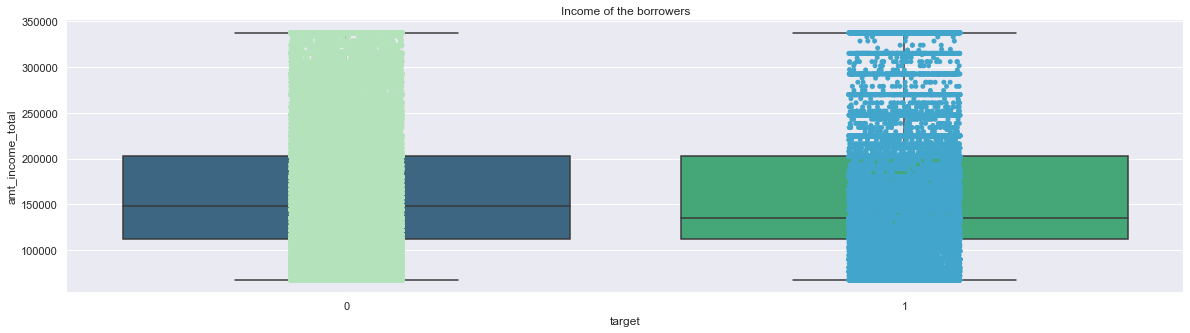

In [ ]:
h.plot_box_stripplot(cleaned_train_df, "target", "amt_income_total", "Income of the borrowers")

In the defaulter group we can see visually that the mean of total income is lower and there are less higher income values (over 75th quartile).

In [ ]:
cleaned_train_df.groupby("target")["amt_income_total"].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,282682.00,163658.65,72891.64,67500.00,112500.00,148500.00,202500.00,337500.00
1,24825.00,157576.12,67867.84,67500.00,112500.00,135000.00,202500.00,337500.00


There extreme outliers (which were found) are replaced with the last values of 5th and 9th percentile). But we can obviously see, that the mean and median of total income in the defaulters group is lower.

* **Inferential statistical analysis:**

**Research question**
When considering people, who had no problem with loan repayments and loan defaulters, is the difference in means of total income amount in these two groups statistically significant? (hypothesis test comparing means of two independent populations)

**Population**: all loan receivers.

**Population subgroups**: 
1. non defaulters borrowers;

2. loan defaulters.

**Parameter of Interest**: difference in population subgroups mean loan amount.

**Power of the test** ($1 - \beta$) - 0.8 as a convention.

**Significance level**: 0.05

**Null Hypothesis:** H(O): $\mu$ (1) -$\mu$ (2) = 0

**Alternative Hypothesis:** $\mu$ (1) - $\mu$ (2) > 0

This will be a *one tail* testing.


In [ ]:
inferent_statist_income_means = h.DiffMeans(cleaned_train_df, "target", "amt_income_total")

In [ ]:
inferent_statist_income_means.make_populations()

In [ ]:
inferent_statist_income_means.make_table()

,count,mean,std
target,,,
0,282682,163658.65,72891.64
1,24825,157576.12,67867.84


**Assumptions**:
1. I assume that those are simple random samples. Samples are independent one from each other.
2. The distributions of total income amount of both subpopulations doesn't seem normal, both are skewed to the right, but there are more than 300k observations per both data sets, so accounting on Central limit theorem, I still proceed the z-testing.
3. I assume that the standard deviations of these two populations are not similar. That's why I use the unpooled approach.

The difference of these two means is:

In [ ]:
inferent_statist_income_means.diff_of_means()

6082.530853087286

* Required sample size to avoid p-hacking in each of the populations:
The same with this [calculator](https://www.stat.ubc.ca/~rollin/stats/ssize/n2)

In [ ]:
inferent_statist_income_means.sample_size_needed()

Required sample size:1658


We have a lot bigger sample sizes, so p-hacking should be avoid.

In [ ]:
inferent_statist_income_means.z_statistics("unequal")

Z-statistic: 13.456, p-value: 0.0


To conclude, the z - statistics:  13.45, so the difference between sample means of total credit amount, are above the hypothesized 0 value by more than 19 estimated standard errors, thats a lot. The p-value is actually equal to zero and is definitely smaller than the alpha of 0.05. So, there's enough evidence to reject the NULL hypothesis. The difference of the means of total income amounts is significantly higher in the group of non defaulters. So from data we have, can be concluded that, people, payed credit in time and without problems, statistically on average got bigger total incomes.

* Confidence interval of the difference between two means of loan amount.
1. Confidence level of 95%.
2. Significant level alpha = 0.05
3. Unpooled approach.

In [ ]:
inferent_statist_income_means.conf_interval_of_difference("unequal")

(5196.84930193288, 6968.86588830381)


From confidence interval we see that the difference in means of credit amount between target groups is from 5196 to 6968 and 0 is not in that interval.

* Type of the income.

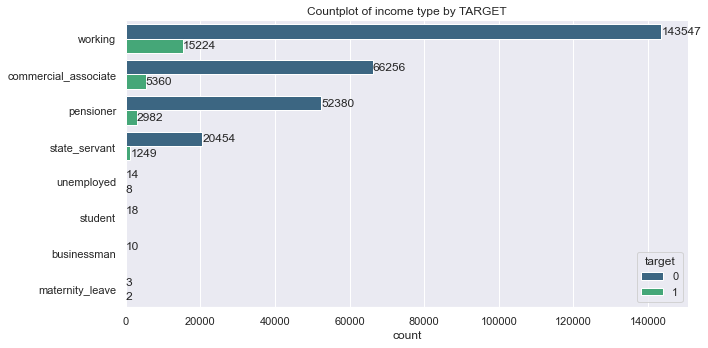

In [ ]:
h.plot_countplot_vertical(cleaned_train_df, "name_income_type", "target", "Countplot of income type by TARGET", (10,5))

Mostly people are working.

In [ ]:
cleaned_train_df.groupby(["name_income_type"]).agg({"amt_income_total": ["mean", "median", "count"]})

amt_income_total                  
                                 mean    median   count
name_income_type                                       
businessman                 283500.00 337500.00      10
commercial_associate        190168.57 180000.00   71617
maternity_leave             139500.00  90000.00       5
pensioner                   135994.66 117000.00   55362
state_servant               173820.03 157500.00   21703
student                     158000.00 157500.00      18
unemployed                  120068.18  78750.00      22
working                     159007.50 135000.00  158774

Seems that student, unemployed, pensioners have quite large incomes. Most of the borrowers are working people. Highest incomes are in the businessman, comercial_associate group.

* Employment length.

In [ ]:
cleaned_train_df.groupby("target")["employment_years"].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,282686.00,7.44,6.10,0.00,2.65,6.28,10.82,49.07
1,24825.00,5.65,5.12,0.00,1.85,3.98,8.65,44.02


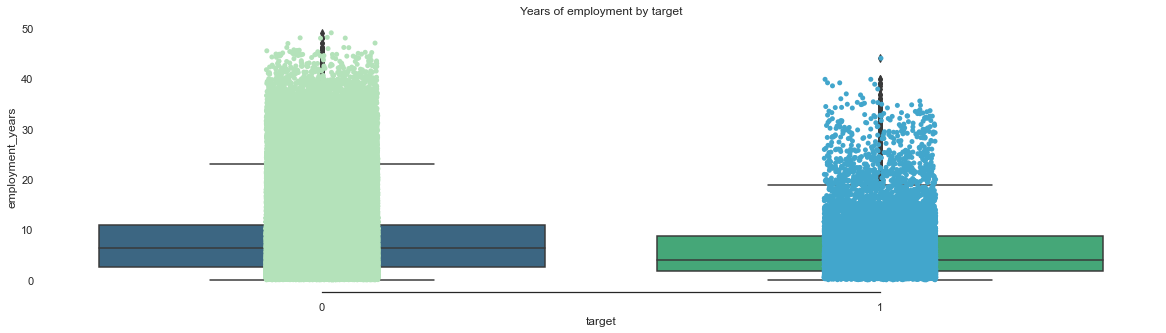

In [ ]:
h.plot_box_stripplot(cleaned_train_df, "target", "employment_years", "Years of employment by target")

We can obviously see that, tne mean of employment is higher by almost 2 years in the non defaulters group. Also there are more outlier int his group - more people have longer employment history than 25 years. Lower length of employment indicates possible default.

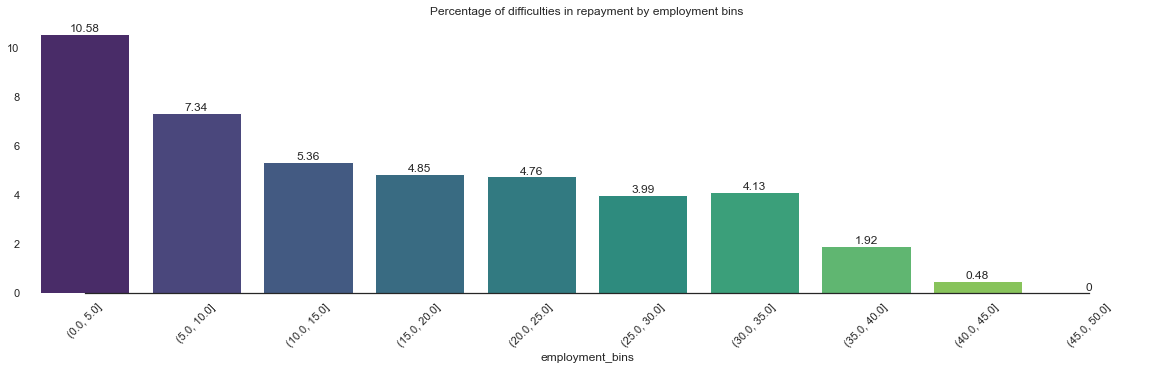

In [ ]:
employment_groups_repayment  = pd.DataFrame(cleaned_train_df.groupby("employment_bins")["target"].mean()*100).round(2)
h.plot_barplot(employment_groups_repayment, "target", "Percentage of difficulties in repayment by employment bins", (20,5))

We can obviously see that people with no or minimal employment length has on average more problems with loan repayment: almost 11 percent of borrowers in the low employment group had default cases, from 5 to 10 years of employment - 7,34 percent. The percent of default cases by employment length groups decreases as the employment length increases.

* Type of occupation

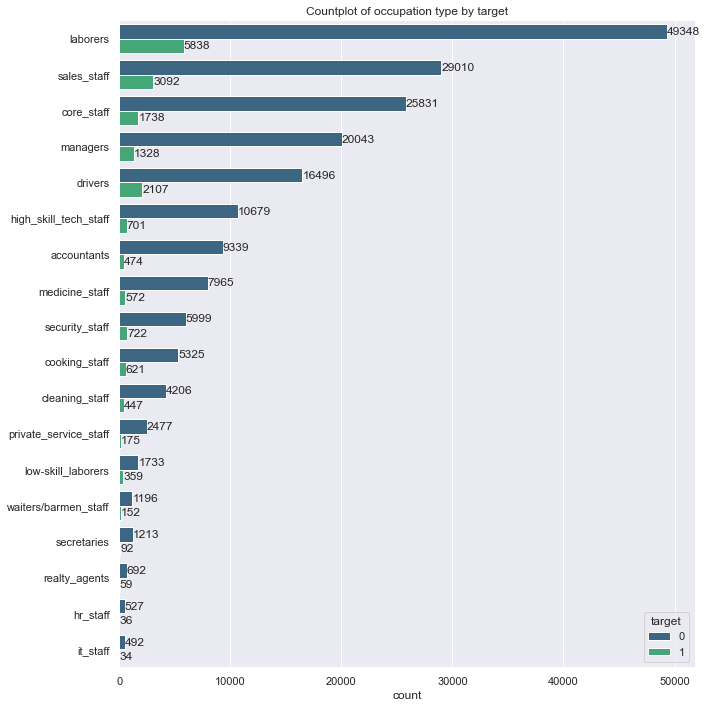

In [ ]:
h.plot_countplot_vertical(
    cleaned_train_df,
    "occupation_type",
    "target",
    "Countplot of occupation type by target",
    (10, 10),
)

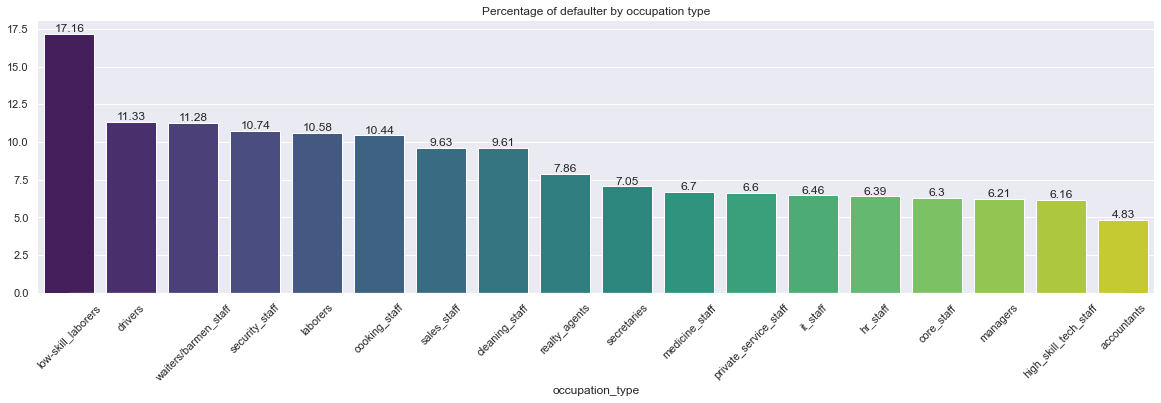

In [ ]:
occupation_percentage = (
    h.make_crosstab_percent(cleaned_train_df, "occupation_type", "target")
    .round(2)
    .sort_values(ascending=False, by=1)
)
h.plot_barplot(
    occupation_percentage, 1, "Percentage of defaulter by occupation type", (20, 5)
)

The highest number (percentage) of defaulters work as low-skilled laborers, then drivers, waitress/barmen_staff. This means, that mostly defaulters are low skilled workers. 

In [ ]:
income_ocupation = pd.crosstab(cleaned_train_df.name_income_type, cleaned_train_df.occupation_type, dropna=True).style.background_gradient(cmap="viridis", low=.5, high=0).highlight_null("red")
income_ocupation

occupation_type,accountants,cleaning_staff,cooking_staff,core_staff,drivers,high_skill_tech_staff,hr_staff,it_staff,laborers,low-skill_laborers,managers,medicine_staff,private_service_staff,realty_agents,sales_staff,secretaries,security_staff,waiters/barmen_staff
name_income_type,,,,,,,,,,,,,,,,,,
businessman,0,0,0,1,0,0,0,0,0,0,7,0,0,0,0,0,0,0
commercial_associate,3970,892,1305,6528,4916,3495,220,204,12763,370,8916,1036,989,324,11104,343,1559,386
maternity_leave,1,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0
pensioner,0,2,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
state_servant,729,261,453,6956,815,1033,64,55,1868,25,2142,2585,38,9,186,264,380,53
student,1,0,0,3,1,0,0,0,5,2,0,0,0,0,0,0,0,1
working,5112,3498,4188,14080,12871,6852,279,267,40548,1696,10306,4915,1625,418,20811,698,4782,908


Largest group are working people and they have showed all types of possible occupation. But students, pensioners and even persons in maternity leave also declared as working in different occupation types and they can have incomes in that situation too.

In [ ]:
# fill Nan's.
cleaned_train_df["occupation_type"].fillna("unknown", inplace=True)

* Type of organization borrower works in.

In [ ]:
h.make_crosstab_percent(cleaned_train_df, "target", "organization_type")

organization_type,advertising,agriculture,bank,business_entity_type_1,business_entity_type_2,business_entity_type_3,cleaning,construction,culture,electricity,emergency,government,hotel,housing,industry:_type_1,industry:_type_10,industry:_type_11,industry:_type_12,industry:_type_13,industry:_type_2,industry:_type_3,industry:_type_4,industry:_type_5,industry:_type_6,industry:_type_7,industry:_type_8,industry:_type_9,insurance,kindergarten,legal_services,medicine,military,mobile,other,police,postal,realtor,religion,restaurant,school,security,security_ministries,self-employed,services,telecom,trade:_type_1,trade:_type_2,trade:_type_3,trade:_type_4,trade:_type_5,trade:_type_6,trade:_type_7,transport:_type_1,transport:_type_2,transport:_type_3,transport:_type_4,university,xna
target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.14,0.78,0.84,1.94,3.41,21.82,0.08,2.10,0.13,0.31,0.18,3.42,0.32,0.96,0.33,0.04,0.87,0.13,0.02,0.15,1.04,0.28,0.20,0.04,0.43,0.01,1.11,0.20,2.26,0.10,3.70,0.88,0.10,5.45,0.79,0.70,0.13,0.03,0.57,2.96,1.03,0.66,12.21,0.52,0.19,0.11,0.63,1.11,0.02,0.02,0.21,2.51,0.07,0.72,0.35,1.73,0.45,18.53
1,0.14,1.04,0.52,1.96,3.63,25.47,0.12,3.16,0.08,0.25,0.16,2.92,0.25,0.95,0.46,0.03,0.94,0.06,0.04,0.13,1.40,0.36,0.17,0.03,0.42,0.01,0.91,0.14,1.95,0.10,2.97,0.54,0.12,5.14,0.47,0.73,0.17,0.02,0.85,2.12,1.31,0.39,15.74,0.42,0.18,0.12,0.54,1.45,0.01,0.01,0.12,2.98,0.04,0.69,0.75,2.02,0.26,12.04


Conclusions:
* we can see a little difference, that by the percentage, non default borrowers work more in: Bank, Government, Kindergarten, Medicine, School.
* by percentage defaulter more work in: Trade type 3 and 7, are self_employed, Construction, Business entity type 3.
All other organization for non defaulters and defaulters are actually very similar by percentage.

In [ ]:
# additional cleaning.
cleaned_train_df = cleaned_train_df.drop(columns="own_car_age", axis=1)

### **3.4. Correlation**

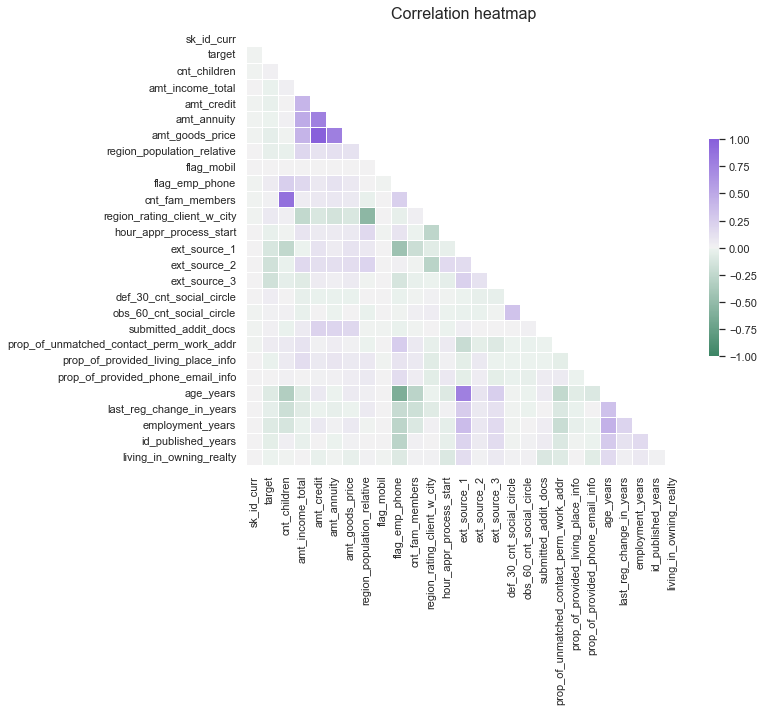

In [ ]:
corr = cleaned_train_df.select_dtypes(exclude=[object])
h.plot_heatmap(corr, "Correlation heatmap")

In [ ]:
correlation_matrix = cleaned_train_df.corr()
correlation_matrix = correlation_matrix[["target"]]
correlation_matrix = correlation_matrix[
    correlation_matrix.index.str.contains("target") == False
]
correlation_matrix = correlation_matrix.loc[
    (correlation_matrix["target"] >= 0.05)
    | (correlation_matrix["target"] <= -0.05)
].reset_index()

In [ ]:
correlation_matrix

,index,target
0,region_rating_client_w_city,0.06
1,ext_source_1,-0.12
2,ext_source_2,-0.16
3,ext_source_3,-0.16
4,age_years,-0.08
5,employment_years,-0.08
6,id_published_years,-0.05


The correlation coefficient with the target is very low, but we will see how it goes in the modeling part. From the heatmap we can see that some features are correlated with each other too much:
* cnt_children and cnt_family_members: they deliver very similar information and are positively correlated;
* amt_credit, amt_goods_price and amt_annuity;
* days_registration and last_reg_change in years;
* ext_source_1 with age_years, we saw that probably this feature includes age of the borrower inside it;
We have to be aware of Multicollinearity.
Also flag_emp_phone has stronger correlation with lots of features and that look suspicious to me, I think this feature at all is not so important as we have other contact information and features, describing borrowers employment.
So I decided to drop it.

In [ ]:
cleaned_train_df = cleaned_train_df.drop(columns="flag_emp_phone", axis=1)

In [ ]:
# Had problems with saving file, so changed the dtype.
# There's need to correct dtypes in the dataframe
convert_dict = {"sk_id_curr": int,
                "target": int,
                "cnt_children":int,
                "flag_mobil":int,
                "cnt_fam_members":int,
                "region_rating_client_w_city":int,
                "hour_appr_process_start":int,
                "def_30_cnt_social_circle":int,
                "obs_60_cnt_social_circle":int,
                "amt_req_credit_bureau_year":int,
                "age_bins":object,
                "employment_bins":object
                }
 
cleaned_train_df = cleaned_train_df.astype(convert_dict)
cleaned_train_df.dtypes.T

In [ ]:
# cleaned_train_df.to_csv("main_loans.csv", index=False)

# 4. Previous Home Credit data

### 4.1. Previous applications in Home credit

In [ ]:
h.missing_data(previous_application_df).head(5)

,Total,Percent
rate_interest_privileged,1664263,99.64
rate_interest_primary,1664263,99.64
amt_down_payment,895844,53.64
rate_down_payment,895844,53.64
name_type_suite,820405,49.12


In [ ]:
# Lower case column names.
h.lower_case_column_names(previous_application_df)

In [ ]:
previous_application_df.head()

,sk_id_prev,sk_id_curr,name_contract_type,amt_annuity,amt_application,amt_credit,amt_down_payment,amt_goods_price,weekday_appr_process_start,hour_appr_process_start,flag_last_appl_per_contract,nflag_last_appl_in_day,rate_down_payment,rate_interest_primary,rate_interest_privileged,name_cash_loan_purpose,name_contract_status,days_decision,name_payment_type,code_reject_reason,name_type_suite,name_client_type,name_goods_category,name_portfolio,name_product_type,channel_type,sellerplace_area,name_seller_industry,cnt_payment,name_yield_group,product_combination,days_first_drawing,days_first_due,days_last_due_1st_version,days_last_due,days_termination,nflag_insured_on_approval
0,2030495,271877,Consumer loans,1730.43,17145.00,17145.00,0.00,17145.00,SATURDAY,15,Y,1,0.00,0.18,0.87,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00,middle,POS mobile with interest,365243.00,-42.00,300.00,-42.00,-37.00,0.00
1,2802425,108129,Cash loans,25188.62,607500.00,679671.00,NaN,607500.00,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00,low_action,Cash X-Sell: low,365243.00,-134.00,916.00,365243.00,365243.00,1.00
2,2523466,122040,Cash loans,15060.74,112500.00,136444.50,NaN,112500.00,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,high,Cash X-Sell: high,365243.00,-271.00,59.00,365243.00,365243.00,1.00
3,2819243,176158,Cash loans,47041.33,450000.00,470790.00,NaN,450000.00,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,middle,Cash X-Sell: middle,365243.00,-482.00,-152.00,-182.00,-177.00,1.00
4,1784265,202054,Cash loans,31924.40,337500.00,404055.00,NaN,337500.00,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


* Total number of approved and refused applications by client.

In [ ]:
total_applications = pd.DataFrame(
    {
        "total_appl_hc": previous_application_df.groupby("sk_id_curr")[
            "sk_id_prev"
        ].count()
    }
).reset_index()

* Approved applications stats for certain clients.

In [ ]:
approved = previous_application_df[
    previous_application_df["name_contract_status"] == "Approved"
][
    [
        "sk_id_prev",
        "sk_id_curr",
        "name_contract_type",
        "days_decision",
        "amt_annuity",
        "amt_credit",
        "name_client_type",
        "cnt_payment",
        "name_yield_group",
    ]
]
approved["amt_annuity"].fillna(0, inplace=True)
approved["cnt_payment"].fillna(0, inplace=True)
approved["amt_credit"].fillna(0, inplace=True)

In [ ]:
approved_numeric_summary = pd.DataFrame(
    {
        "prev_approved_hc": approved.groupby("sk_id_curr")["sk_id_prev"].count(),
        "prev_amt_credit_mean_hc": approved.groupby("sk_id_curr")["amt_credit"].mean(),
        "prev_amt_annuity_mean_hc": approved.groupby("sk_id_curr")[
            "amt_annuity"
        ].mean(),
        "prev_min_loan_term_hc": approved.groupby("sk_id_curr")["cnt_payment"].min(),
        "prev_max_loan_term_hc": approved.groupby("sk_id_curr")["cnt_payment"].max(),
        "prev_days_from_last_approval_hc": approved.groupby("sk_id_curr")[
            "days_decision"
        ].max(),
    }
).reset_index()
approved_numeric_summary

In [ ]:
approved_categorical = h.count_categorical_norm(approved, "sk_id_curr", "approved_hc")

In [ ]:
merged_approved = approved_numeric_summary.merge(approved_categorical, on = "sk_id_curr", how = "left")
merged_approved = merged_approved.merge(total_applications, on = "sk_id_curr", how = "left")
merged_approved.head()

,sk_id_curr,prev_approved_hc,prev_amt_credit_mean_hc,prev_amt_annuity_mean_hc,prev_min_loan_term_hc,prev_max_loan_term_hc,prev_days_from_last_approval_hc,approved_hc_name_contract_type_Cash loans_normalized,approved_hc_name_contract_type_Consumer loans_normalized,approved_hc_name_contract_type_Revolving loans_normalized,approved_hc_name_client_type_New_normalized,approved_hc_name_client_type_Refreshed_normalized,approved_hc_name_client_type_Repeater_normalized,approved_hc_name_client_type_XNA_normalized,approved_hc_name_yield_group_XNA_normalized,approved_hc_name_yield_group_high_normalized,approved_hc_name_yield_group_low_action_normalized,approved_hc_name_yield_group_low_normal_normalized,approved_hc_name_yield_group_middle_normalized,total_appl_hc
0,100001,1,23787.00,3951.00,8.00,8.00,-1740,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1
1,100002,1,179055.00,9251.77,24.00,24.00,-606,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1
2,100003,3,484191.00,56553.99,6.00,12.00,-746,0.33,0.67,0.00,0.00,0.67,0.33,0.00,0.00,0.00,0.00,0.33,0.67,3
3,100004,1,20106.00,5357.25,4.00,4.00,-815,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1
4,100005,1,40153.50,4813.20,12.00,12.00,-757,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,2


* Rejected applications stats  for every client.

In [ ]:
rejected = previous_application_df[
    previous_application_df["name_contract_status"] == "Refused"
][
    [
        "sk_id_prev",
        "sk_id_curr",
        "amt_application",

    ]
]

In [ ]:
rejected_summary = pd.DataFrame({"total_rejected_appl_hc": rejected.groupby("sk_id_curr")["sk_id_prev"].count(),
                                "prev_reject_amt_appl_mean_hc" : rejected.groupby("sk_id_curr")["amt_application"].mean()}).reset_index()
rejected_summary.head()

,sk_id_curr,total_rejected_appl_hc,prev_reject_amt_appl_mean_hc
0,100006,1,688500.00
1,100011,1,0.00
2,100027,1,225000.00
3,100030,10,33767.12
4,100035,8,241875.00


In [ ]:
total_from_applications_hc = merged_approved.merge(rejected_summary, on="sk_id_curr", how="left")
total_from_applications_hc.fillna(0, inplace=True)

In [ ]:
home_credit_total_data1 = cleaned_train_df.merge(total_from_applications_hc, on="sk_id_curr", how="left")
home_credit_total_data1.tail()

### 4.2. Balance previous loans in Home credit

In [ ]:
pos_cash_balance_df.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.00,45.00,Active,0,0
1,1715348,367990,-33,36.00,35.00,Active,0,0
2,1784872,397406,-32,12.00,9.00,Active,0,0
3,1903291,269225,-35,48.00,42.00,Active,0,0
4,2341044,334279,-35,36.00,35.00,Active,0,0


In [ ]:
# Lower case column names.
h.lower_case_column_names(pos_cash_balance_df)

In [ ]:
h.missing_data(pos_cash_balance_df)

,Total,Percent
cnt_instalment_future,26087,0.26
cnt_instalment,26071,0.26
sk_id_prev,0,0.00
sk_id_curr,0,0.00
months_balance,0,0.00
name_contract_status,0,0.00
sk_dpd,0,0.00
sk_dpd_def,0,0.00


In [ ]:
pos_cash_balance_df.fillna(0, inplace=True)

* Stats of future installments by client.

In [ ]:
future_instalments = pd.DataFrame(pos_cash_balance_df.groupby(["sk_id_prev","sk_id_curr"])["cnt_instalment_future"].min()).reset_index()
future_instalments.head()

,sk_id_prev,sk_id_curr,cnt_instalment_future
0,1000001,158271,0.00
1,1000002,101962,0.00
2,1000003,252457,9.00
3,1000004,260094,0.00
4,1000005,176456,0.00


* Count active credits for clients.

In [ ]:
active_credits = future_instalments[future_instalments["cnt_instalment_future"] > 0]
active_credits = pd.DataFrame(
    {
        "total_active_credits_hc": active_credits.groupby("sk_id_curr")[
            "sk_id_prev"
        ].count()
    }
).reset_index()
active_credits.head()

* Total number of left installment by all previous credits in the future.

In [ ]:
future_instalments_total = pd.DataFrame(
    {
        "total_future_instalments_by_other_credts_hc": future_instalments.groupby(
            "sk_id_curr"
        )["cnt_instalment_future"].sum()
    }
)
future_instalments_total

* Delayed payments: counts total days of payment delays by each previous loan and then gives the mean of delayed days per loan for each borrower and total number of all delayed days epr all loans. 0 - when there were no delays at all.

In [ ]:
delays = pd.DataFrame(pos_cash_balance_df.groupby(["sk_id_prev","sk_id_curr"])["sk_dpd"].sum()).reset_index()

In [ ]:
number_of_defaults = delays[delays["sk_dpd"] > 0]
number_of_defaults = pd.DataFrame(
    {
        "total_defaults_previous_credits_hc": number_of_defaults.groupby("sk_id_curr")[
            "sk_id_prev"
        ].count()
    }
).reset_index()
number_of_defaults.head()

In [ ]:
delays_per_loan = delays.groupby("sk_id_curr")["sk_dpd"].agg(
    mean_delayed_days_per_all_loans_hc="mean",
    total_delayed_days_per_all_loans_hc="sum").reset_index()

* Merging all data from pos_cash.

In [ ]:
total_balance = delays_per_loan.merge(future_instalments_total, on="sk_id_curr", how="left")

In [ ]:
total_balance = total_balance.merge(active_credits, on="sk_id_curr", how="left").fillna(0)
total_balance = total_balance.merge(number_of_defaults,on="sk_id_curr", how="left").fillna(0)
total_balance.head()

In [ ]:
home_credit_total_data2 = home_credit_total_data1.merge(total_balance, on="sk_id_curr", how="left")
home_credit_total_data2.fillna(0, inplace=True)

### 4.3. Previous installments in Home credit

In [ ]:
installment_payments_df.head(2)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.00,6,-1180.00,-1187.00,6948.36,6948.36
1,1330831,151639,0.00,34,-2156.00,-2156.00,1716.53,1716.53


In [ ]:
installment_payments_df.isna().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

In [ ]:
h.lower_case_column_names(installment_payments_df)

* Min, max, mean instalment in the Home Credit loans amount.

In [ ]:
instalment_amt = pd.DataFrame(
    {
        "average_instalm_amt": installment_payments_df.groupby(
            ["sk_id_prev", "sk_id_curr"]
        )["amt_instalment"].mean(),
        "total_instalm_amt": installment_payments_df.groupby(
            ["sk_id_prev", "sk_id_curr"]
        )["amt_instalment"].sum(),
    }
).reset_index()

Installments summary by current clients from all their previous loans in Home Credit.

In [ ]:
instalment_summary = instalment_amt.groupby("sk_id_curr")["average_instalm_amt"].agg(
    min_instal_amt_per_prev_credit_hc="min",
    max_instal_amt_per_prev_credit_hc="max",
    mean_instal_amt_per_prev_credit_hc="mean",)
instalment_summary.head()

In [ ]:
total_instal_amt = pd.DataFrame(
    {
        "total_instalments_amt_prev_credit_hc": instalment_amt.groupby("sk_id_curr")[
            "total_instalm_amt"
        ].sum()
    }
).reset_index()
total_instal_amt.head()

In [ ]:
instalment_summary_total = instalment_summary.merge(total_instal_amt, on="sk_id_curr", how="left")
instalment_summary_total.head()

In [ ]:
home_credit_total_data3 = home_credit_total_data2.merge(instalment_summary_total, on="sk_id_curr", how="left")
home_credit_total_data3.fillna(0, inplace=True)

### 4.4. Previous credit card data in Home credit

In [ ]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.97,135000,0.00,877.50,0.00,877.50,1700.33,1800.00,1800.00,0.00,0.00,0.00,0.00,1,0.00,1.00,35.00,Active,0,0
1,2582071,363914,-1,63975.56,45000,2250.00,2250.00,0.00,0.00,2250.00,2250.00,2250.00,60175.08,64875.56,64875.56,1.00,1,0.00,0.00,69.00,Active,0,0
2,1740877,371185,-7,31815.22,450000,0.00,0.00,0.00,0.00,2250.00,2250.00,2250.00,26926.42,31460.08,31460.08,0.00,0,0.00,0.00,30.00,Active,0,0
3,1389973,337855,-4,236572.11,225000,2250.00,2250.00,0.00,0.00,11795.76,11925.00,11925.00,224949.29,233048.97,233048.97,1.00,1,0.00,0.00,10.00,Active,0,0
4,1891521,126868,-1,453919.46,450000,0.00,11547.00,0.00,11547.00,22924.89,27000.00,27000.00,443044.40,453919.46,453919.46,0.00,1,0.00,1.00,101.00,Active,0,0


In [ ]:
h.missing_data(credit_card_balance).head(5)

,Total,Percent
AMT_PAYMENT_CURRENT,767988,20.00
AMT_DRAWINGS_ATM_CURRENT,749816,19.52
CNT_DRAWINGS_POS_CURRENT,749816,19.52
AMT_DRAWINGS_OTHER_CURRENT,749816,19.52
AMT_DRAWINGS_POS_CURRENT,749816,19.52


In [ ]:
h.lower_case_column_names(credit_card_balance)

In [ ]:
credit_card_balance[["amt_credit_limit_actual", "amt_drawings_current",  "amt_payment_total_current"]].describe()

In [ ]:
credit_card_balance[credit_card_balance["amt_drawings_current"] < 0]

,sk_id_prev,sk_id_curr,months_balance,amt_balance,amt_credit_limit_actual,amt_drawings_atm_current,amt_drawings_current,amt_drawings_other_current,amt_drawings_pos_current,amt_inst_min_regularity,amt_payment_current,amt_payment_total_current,amt_receivable_principal,amt_recivable,amt_total_receivable,cnt_drawings_atm_current,cnt_drawings_current,cnt_drawings_other_current,cnt_drawings_pos_current,cnt_instalment_mature_cum,name_contract_status,sk_dpd,sk_dpd_def
438776,2321147,198229,-64,0.00,112500,0.00,-1687.50,0.00,0.00,0.00,220.77,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,38.00,Active,0,0
747302,2340075,114867,-73,1718.10,180000,0.00,-519.57,0.00,0.00,9000.00,182340.00,182340.00,0.00,0.00,0.00,0.00,0,0.00,0.00,18.00,Active,0,0
3284667,2592574,217360,-96,0.00,270000,0.00,-6211.62,0.00,0.00,192.33,14672.20,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,7.00,Active,0,0


Seems that credit balance and drawing can be negative: If you return an item and the amount of the refund exceeds your current credit card balance, it could result in a credit card negative balance [more](https://www.sofi.com/learn/content/negative-balance-on-credit-card/).

In [ ]:
credit_card_balance_sub = credit_card_balance[
    [
        "sk_id_prev",
        "sk_id_curr",
        "amt_credit_limit_actual",
        "amt_drawings_current",
        "amt_payment_total_current",
        "sk_dpd",
    ]
]
credit_card_balance_sub.fillna(0, inplace=True)

* Stats of previous credit cards.

In [ ]:
credit_cards = credit_card_balance_sub.groupby(["sk_id_prev", "sk_id_curr"]).sum().reset_index()

In [ ]:
credit_cards_summary = pd.DataFrame(
    {
        "total_credit_cards_hc": credit_cards.groupby("sk_id_curr")[
            "sk_id_prev"
        ].count(),
        "max_total_per_1cred_card_limit_hc": credit_cards.groupby("sk_id_curr")[
            "amt_credit_limit_actual"
        ].max(),
        "mean_total_per_1cred_card_limit_hc": credit_cards.groupby("sk_id_curr")[
            "amt_credit_limit_actual"
        ].mean(),
        "total_cred_cards_limit_hc": credit_cards.groupby("sk_id_curr")[
            "amt_credit_limit_actual"
        ].sum(),
        "total_cred_cards_drawings_hc": credit_cards.groupby("sk_id_curr")[
            "amt_drawings_current"
        ].sum(),
        "mean_drawings_per_1cred_card_hc": credit_cards.groupby("sk_id_curr")[
            "amt_drawings_current"
        ].mean(),
        "total_cred_cards_payments_hc": credit_cards.groupby("sk_id_curr")[
            "amt_payment_total_current"
        ].sum(),
        "mean_credit_card_payment_hc": credit_cards.groupby("sk_id_curr")[
            "amt_payment_total_current"
        ].mean(),
        "total_default_days_per_all_cred_cards_hc": credit_cards.groupby("sk_id_curr")[
            "sk_dpd"
        ].sum(),
    }
).reset_index()
credit_cards_summary.head()

* Total count of defaults in credit cards Home credit by current client.

In [ ]:
defaults_credit_cards = credit_cards[credit_cards["sk_dpd"] > 0]
defaults_credit_cards = pd.DataFrame(
    {
        "total_defaults_credit_cards_hc": defaults_credit_cards.groupby("sk_id_curr")[
            "sk_id_prev"
        ].count()
    }
).reset_index()
defaults_credit_cards.head()

In [ ]:
credit_cards_summary_total = credit_cards_summary.merge(defaults_credit_cards, on="sk_id_curr", how="left").fillna(0)

In [ ]:
credit_cards_summary_total.head(2)

,sk_id_curr,total_credit_cards_hc,max_total_per_1cred_card_limit_hc,mean_total_per_1cred_card_limit_hc,total_cred_cards_limit_hc,total_cred_cards_drawings_hc,mean_drawings_per_1cred_card_hc,total_cred_cards_payments_hc,mean_credit_card_payment_hc,total_default_days_per_all_cred_cards_hc,total_defaults_credit_cards_hc
0,100006,1,1620000,1620000.00,1620000,0.00,0.00,0.00,0.00,0,0.00
1,100011,1,12150000,12150000.00,12150000,180000.00,180000.00,334485.00,334485.00,0,0.00


In [ ]:
home_credit_total_data4 = home_credit_total_data3.merge(credit_cards_summary_total, on="sk_id_curr", how="left")
home_credit_total_data4.fillna(0, inplace=True)

In [ ]:
# home_credit_total_data4.to_csv("main_loans_&_previous_HC.csv", index=False)

# 5. Credit Bureau data

### 5.1. Credit Bureau data

In [ ]:
h.missing_data(bureau_df).head()

,Total,Percent
AMT_ANNUITY,1226791,71.47
AMT_CREDIT_MAX_OVERDUE,1124488,65.51
DAYS_ENDDATE_FACT,633653,36.92
AMT_CREDIT_SUM_LIMIT,591780,34.48
AMT_CREDIT_SUM_DEBT,257669,15.01


In [ ]:
bureau_df["AMT_CREDIT_SUM_DEBT"] = bureau_df["AMT_CREDIT_SUM_DEBT"].fillna(0)
bureau_df["AMT_CREDIT_SUM"] = bureau_df["AMT_CREDIT_SUM"].fillna(0)

In [ ]:
h.lower_case_column_names(bureau_df)

In [ ]:
bureau_df.credit_active.value_counts()

Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: credit_active, dtype: int64

* Normalized count of credit types according to Credit Bureau data by each current borrower.

In [ ]:
credit_active = h.count_categorical_norm(bureau_df[["sk_id_curr", "credit_active"]], "sk_id_curr", "bureau")
credit_active.reset_index(inplace=True)

* Stats for all credits in other institutions by current borrower.

In [ ]:
bureau_summary = pd.DataFrame(
    {
        "total_credits_bureau": bureau_df.groupby("sk_id_curr")["sk_id_bureau"].count(),
        "total_credit_types_count_bureau": bureau_df.groupby("sk_id_curr")[
            "credit_type"
        ].nunique(),
        "sum_day_overdue_bureau": bureau_df.groupby("sk_id_curr")["credit_day_overdue"].sum(),
        "mean_day_overdue_per_card_bureau": bureau_df.groupby("sk_id_curr")[
            "credit_day_overdue"
        ].mean(),
        "mean_debt_per_card_bureau": bureau_df.groupby("sk_id_curr")["amt_credit_sum_debt"].mean(),
        "mean_credit_per_card_bureau": bureau_df.groupby("sk_id_curr")["amt_credit_sum"].mean(),
        "avg_credits_prolonged_bureau": bureau_df.groupby("sk_id_curr")[
            "cnt_credit_prolong"
        ].mean(),
    }
).reset_index()

In [ ]:
bureau_summary_total = bureau_summary.merge(credit_active, on="sk_id_curr", how="left")
bureau_summary_total.fillna(0, inplace=True)

In [ ]:
home_credit_total_data4 = pd.read_csv("main_loans_&_previous_HC.csv")
home_credit_total_data4.tail()

In [ ]:
home_credit_total_data5 = home_credit_total_data4.merge(bureau_summary_total, on="sk_id_curr", how="left")
home_credit_total_data5.fillna(0, inplace=True)
home_credit_total_data5.shape

(307511, 91)

In [ ]:
# home_credit_total_data5.to_csv("main_loans_&_previous_HC_Bureau.csv", index=False)

# **Conclusions:**

1. There are only about 8 percent of default cases among all borrowers.
2. "Defaulters" tend to have on average lower loan amounts and it is statistically significant. So probably in the acceptance stage they asked or got lower loan amount, as had some indications about possible payment problems in the future.
3. We can see a quite obvious linear relationship, when the age of borrower rises (from 20 to 50) the average credit amount increases, from 50 years it starts to decrease (obviously as people get retired, their financial and health situation is worse in the age from 50 years).
4. There were only near 200 loans not to buy some kind of good. Mostly people got the asked good price or more money than the showed goods price as a loan.
5. The majority of repayment problem arise in cash loans - 93.54% and in revolving loans - 6.46%. If the total proportion of revolving loans were 10 percent, here we see that problem in repayment had less people with revolving loans - almost 6.5 percent. 
6. Measures of ext_source 1-2-3 are like some kind of risk scores for the borrowers and divides defaulters and non defaulters best. Seems that the third ext_source divides these default and non default cases best, even medians are very different in all the ext_source features. Loan default cases seems to have lover medians of all these features. People, who payed credit in time and without problems, statistically on average had higher normalized score of ext_source_3. 
7. Male tend to have more problem with loan repayment, as they exceed from 34 (in total proportion of all loan receivers) to almost 42 percent in the group of problematic payers.
8. Younger of age (until ~38) receivers had more problem with repayment, and older people (over 55) seems more robust and has less problem with repayment. The mean and median of age is lower in the defaulters group.
We can obviously see that by each 5 year the percentage of defaulted persons is decreasing.
9. The majority of loan receivers had secondary education, then goes higher, incomplete higher, lower secondary education. Let's see by percentage are the any difference in the non defaulters and defaulters.The highest percentage of defaulters (over 10 percent) is in the lower secondary education and people with academic degree are very rare in loan defaults.
10. About 69 percent of borrowers in both target groups have their own house of flat.
11. In the "defaulter" group even  11.4 percent of people were living in the region with rating 3. Seems that the lower the rating, given to the region, the better(or more reliable) this region is. From the first region we have 4.84 percent of defaulters, from the second - 7.92 and from the third - 11.4 percent.
12. Mostly people, who got loans, had no children, then goes 1, 2 or 3 in both groups very similarly. Seems that number of children do not affect loan repayment.Most of the borrowers are either married or single. In the defaulters group we see larger percentage of borrowers with civil marriage and single, lower - marriage (than in non defaulters).
13. Non defaulters on average get higher income. 
14. The highest number (percentage) of defaulters work as low-skilled laborers, then drivers, waitress/barmen_staff. This means, that mostly defaulters are low skilled workers. 
15. The mean of employment length is higher by almost 2 years in the non defaulters group. Also there are more outliers in this group - more people have longer employment history than 25 years. Lower length of employment indicates possible default. We can obviously see that people with no or minimal employment length has on average more problems with loan repayment: almost 11 percent of borrowers in the low employment group had default cases, from 5 to 10 years of employment - 7,34 percent. The percent of default cases by employment length groups decreases as the employment length increases.

**Interesting facts:**

Gender is very important. Male tend to have higher loans on average (difference about 20 k). But there are more Female borrowers and they are less likely to default.

Age is very important. It relates in all situations: with income, with type of education, with possible more responsible behavior while paying the loan. As by agr groups there is a clear conclusion, that younger people tend to default more often. The same situation is with the annuity amount: the average annuity amount gets higher with the age rise up to 50 years of age and then starts to drop.

Weekdays of the application process start doesn't impact default cases, I thought that on weekends people act irresponsible and take loans too often :). But people, who started the loan application process late in the evening from 22 to 24 pm and in early morning from 5 am to 7 am have a slightly higher percentage of default from 10 to 15 percent. So here is that situation, when I would say that these people made a quite important decision spontaneously, in the sleeping hour and probably not considered enough.

Seems that people, who defaulted, were not so permanent and had changed their registration or phone on average closer to the application day. 

There is a difference of 5 % in people, who own a car in the non defaulters group. So could be said, that non defaulters more often have a car.